<center><h1>Using Gaussian processes to create forecasts and reports<h1></center>
 <center><img src="../AC_logo.png"></center>

<h2><center> A quick introduction to Python<center/> <h2>   
    <center><font size = "10"> Functions <br><br> & <br><br> Modules </font>

<center><font size = "6"> A function is a block of code that only runs when called. <br> <br> It takes an input, performs an operation and then gives an output. <br><br> This is useful as you can segment code making it more readable and easy to use. </font></center>

<center><font size = "6">A module is a single function or collection of functions that can be easily imported into your code. <br><br> Importing a module is as simple as typing <br>'Import ModuleName'<br><br>To call a function in this module type <br>ModuleName.FunctionName()</font></center>

<center><font size = "6">An example module is 'numpy'. <br><br> This is the most used module for python, able to perform thousands of mathematical operations very efficiently. <br><br> It takes advantages of arrays, which are lists of data all of the same type, such as (1,2,3),(a,b,c) or (True,False,True) </font></center>

<center><font size = "6"> Here is a quick example of how the numpy module can be imported and one of its functions used to create an array.</font></center>

In [1]:
import numpy as np

AnArray = np.array([0,1,2,3,4])
AnotherArray = np.arange(0,10,2)
TwoDArray = np.full((5,5),0)
print(AnArray)
print(AnotherArray)
print(TwoDArray)

[0 1 2 3 4]
[0 2 4 6 8]
[[0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]]


<center><font size = "6">Arrays like this are how we will store and retrieve data</font></center>

<center><font size = "6">We will now import the modules needed for using Gaussian processes and creating forecasts</font></center>

In [2]:
# Two modules included with anaconda distribution
# Modules can be imported 'as' something. This allows you to shorten the name as needed.

import matplotlib.pyplot as plt
import datetime as dt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Bespoke modules created by the team at Sussex.

import Forecasting
import CreatePDF
import GIF_Creation

<center><font size = "6"> We will now use the numpy module to load in the VCI time series.</font></center>

In [3]:
# Loading in VCI data

Data = np.load('..\Data\VCI_Time_Series.npz',allow_pickle=True)

# Picking a county to run the GP on 

County = 'Garissa'

# Making sure each array has the correct format

Dates,VCI1W,VCI3M = np.array(Data[County][0],dtype=object),np.array(Data[County][2],dtype=float),np.array(Data[County][3],dtype=float)

# Loading in the errors to be used. We shall be forecasting up to 10 weeks.

Errors = np.load('..\Data\Errors.npz')

CountyErrors = Errors[County][:11]


<center><font size = "6"> To plot and visulise the data, we will use the datetime and matplotlib modules</font></center>

In [4]:
# List comprehension to change the format of the dates (Easier for plotting)

def TestPlot(LowerBound,UpperBound):
    PlottingDates = [dt.datetime.strptime(date, "%d-%m-%Y").date() for date in Dates.tolist()]

    # A more simple plotting code

    # Setting the size for the plot


    plt.figure(figsize=(15,7)) 

    # Plotting the data and setting the colour and style of the line


    plt.plot(PlottingDates,VCI1W,color='r',linestyle='-')

    #Setting the size of the text on the x and y axis
    plt.xticks(size=18)
    plt.yticks(size=18)
    plt.ylabel('VCI3M',size=18)
    plt.xlabel('Date',size=18)
    plt.title(County+ ' VCI1W Time Series',size=20)
    plt.xlim(PlottingDates[LowerBound],PlottingDates[UpperBound])
    plt.show()

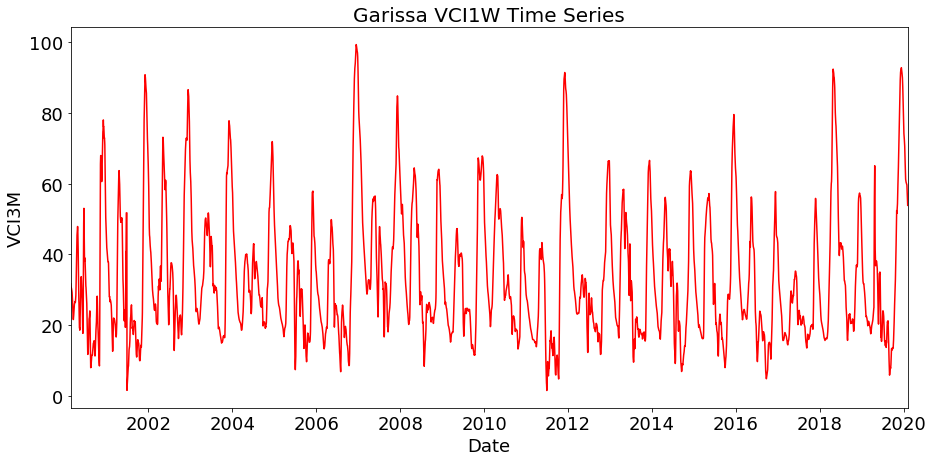

In [5]:
TestPlot(0,-1)

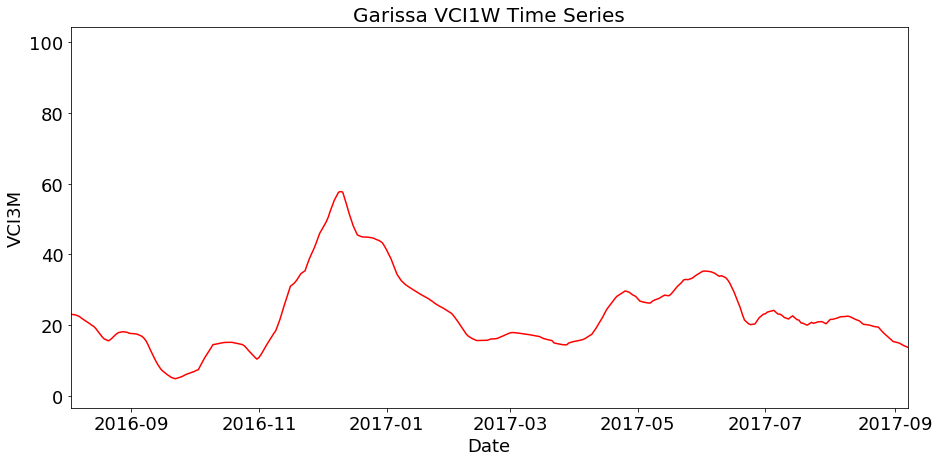

In [6]:
TestPlot(6000,6400)

<center><font size = "6"> We are now going to use the data set to print out a list of counties that can be used. <br><br> To do this, we can take advantage of loops.</font></center>

<center><font size = "6"> Loops are a simple way to repeat the same block of code multiple times. <br><br> In Python, for loops are the most used type as they allow for the iteration through a list or array. </font></center>

In [7]:
# An empty list is created so that each item in Data can be added to it.

Counties = [] 
for item in Data:
    Counties.append(item)
print(Counties)

# Simply copy and paste the county wanted into the cell that loads the data

['Mombasa', 'Kwale', 'Kilifi', 'TanaRiver', 'Lamu', 'TaitaTaveta', 'Garissa', 'Wajir', 'Mandera', 'Marsabit', 'Isiolo', 'Meru', 'TharakaNithi', 'Embu', 'Kitui', 'Machakos', 'Makueni', 'Nyandarua', 'Nyeri', 'Kirinyaga', 'Muranga', 'Kiambu', 'Turkana', 'WestPokot', 'Samburu', 'TransNzoia', 'UasinGishu', 'ElgeyoMarakwet', 'Nandi', 'Baringo', 'Laikipia', 'Nakuru', 'Narok', 'Kajiado', 'Kericho', 'Bomet', 'Kakamega', 'Vihiga', 'Bungoma', 'Busia', 'Siaya', 'Kisumu', 'HomaBay', 'Migori', 'Kisii', 'Nyamira', 'Nairobi']


<center><font size = "6">Now we are ready to run the Gaussian processes code!<br><br> This involves calling a custom module the AstroCast team has created. <br><br> Bescause the function has outputs that we want to use, we must type: <br><br> Output1,Output2 = ModuleName.FunctionName(Input1)</font></center>

In [8]:
PredictionDates,WeeklyDates,WeeklyVCI3M,PredictedValues = Forecasting.GetForecastVCI(Dates,VCI1W,VCI3M)

<center><font size = "6">Now that we have our predicted values for the next 10 weeks from the GP function, we can plot this and add our pre-calculated error</font></center>

## Plot the forecast and the error

In [9]:
# Slightly fancier code to plot. 

# Adjusting the figure size

def PredPlot():
    fig,ax1 = plt.subplots(figsize=(15,7))

    # Shading in the graph to represent the possible error on the forecast. (95% confidence interval)

    ax1.fill_between(PredictionDates, PredictedValues-CountyErrors, PredictedValues+CountyErrors,lw=3,
                     color='blue',alpha=0.45)

    # Plotting the actual forecast line

    ax1.plot(PredictionDates,PredictedValues,linestyle = '-' ,lw = 3, color = 'black')

    # Setting the title

    ax1.set_title('Forecast for ' + County,size=20)

    # Labeling the axes

    ax1.set_ylabel('VCI3M',size=18)
    ax1.set_xlabel('Date',size=18)
    plt.xticks(size=18)
    plt.yticks(size=18)
    plt.show()

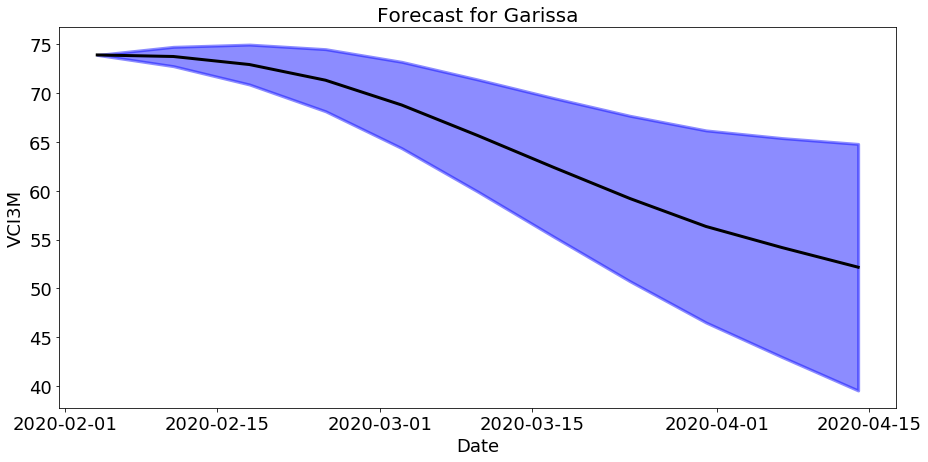

In [10]:
PredPlot()

# Create the PDF report

<center><font size = "6">We can now create a PDF report from the forecast we have just created. <br><br> We will use another custom module for this. It takes several inputs to create a map,table and graph. <br><br> It will automatically save the PDF to the 'Forecasts' folder</font></center>

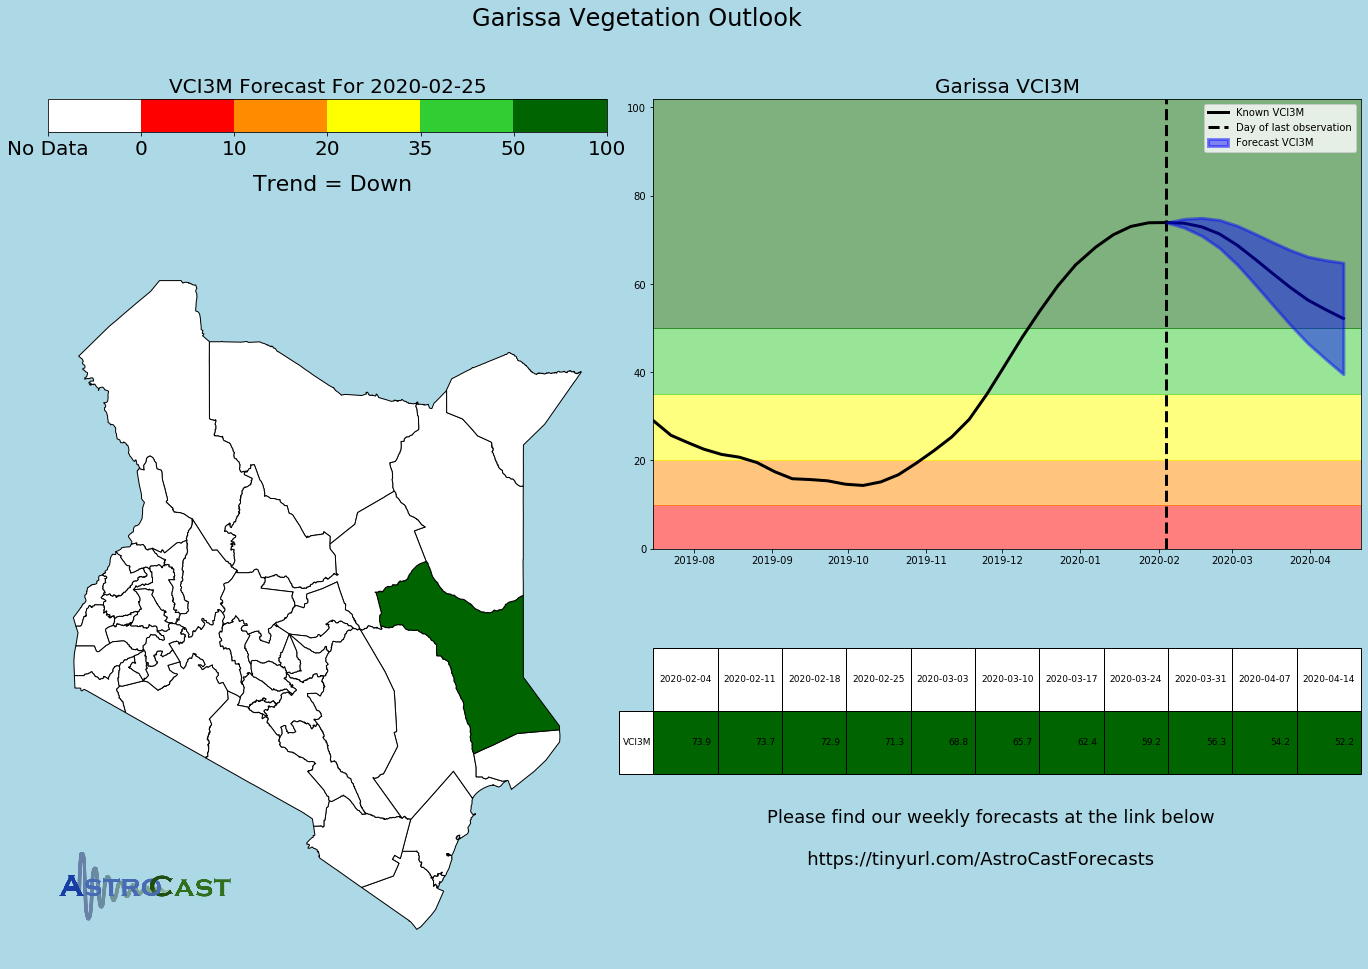

In [11]:
CreatePDF.PDF(PredictionDates,PredictedValues,WeeklyDates,WeeklyVCI3M,CountyErrors,County,CountyNo=None,AllCounties=False)

<center><font size = "6"> Now that PDF reports can be created, we can loop over all the counties and produce a report for each one. <br><br> This can take around 5-10 minuts to run. <br><br> They will all be saved in a folder called forecasts.</font></center>

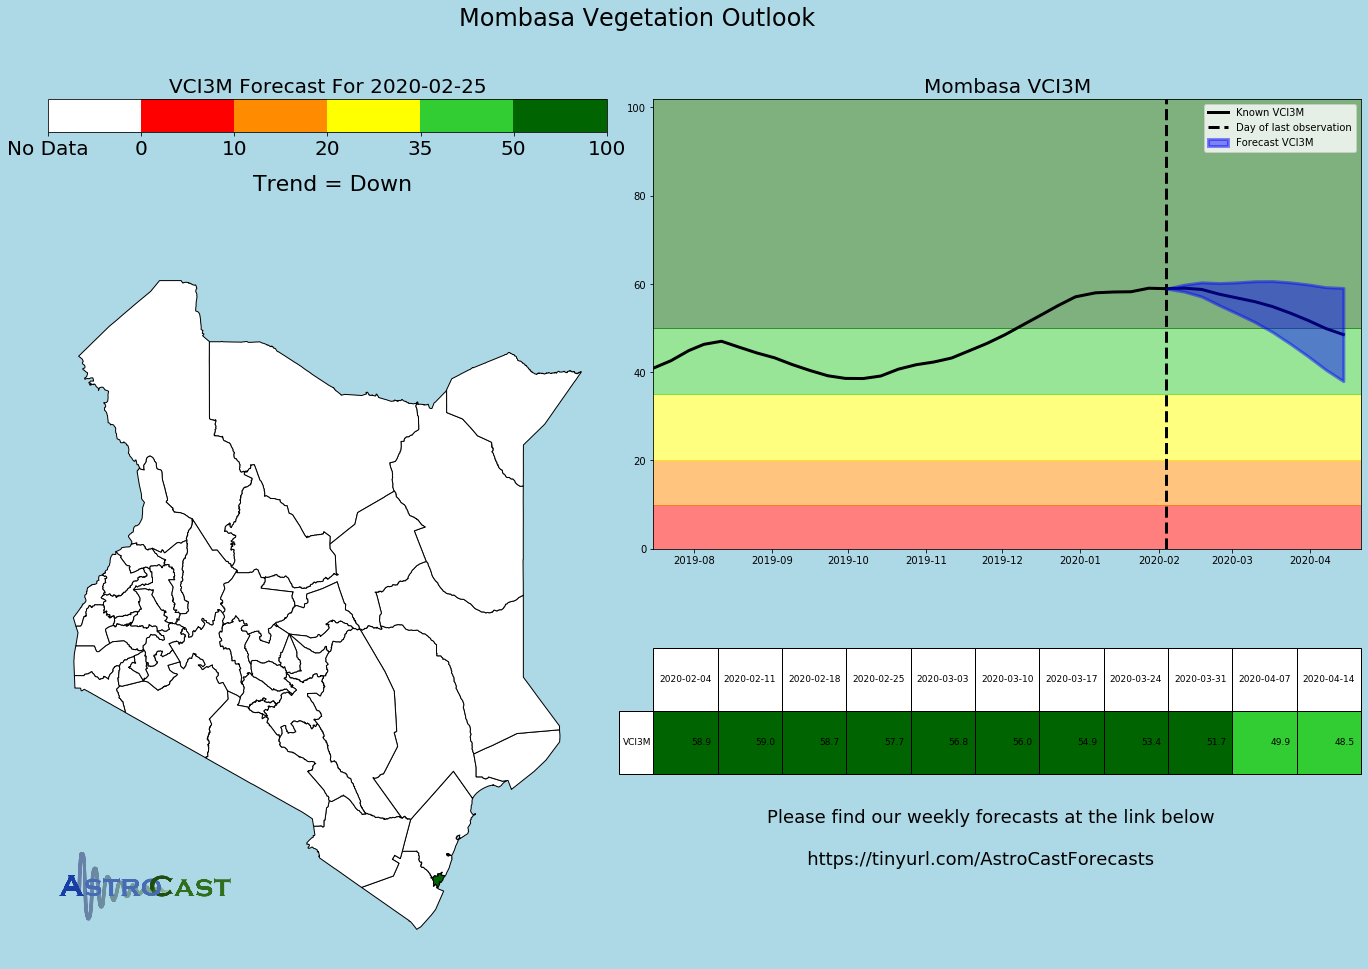

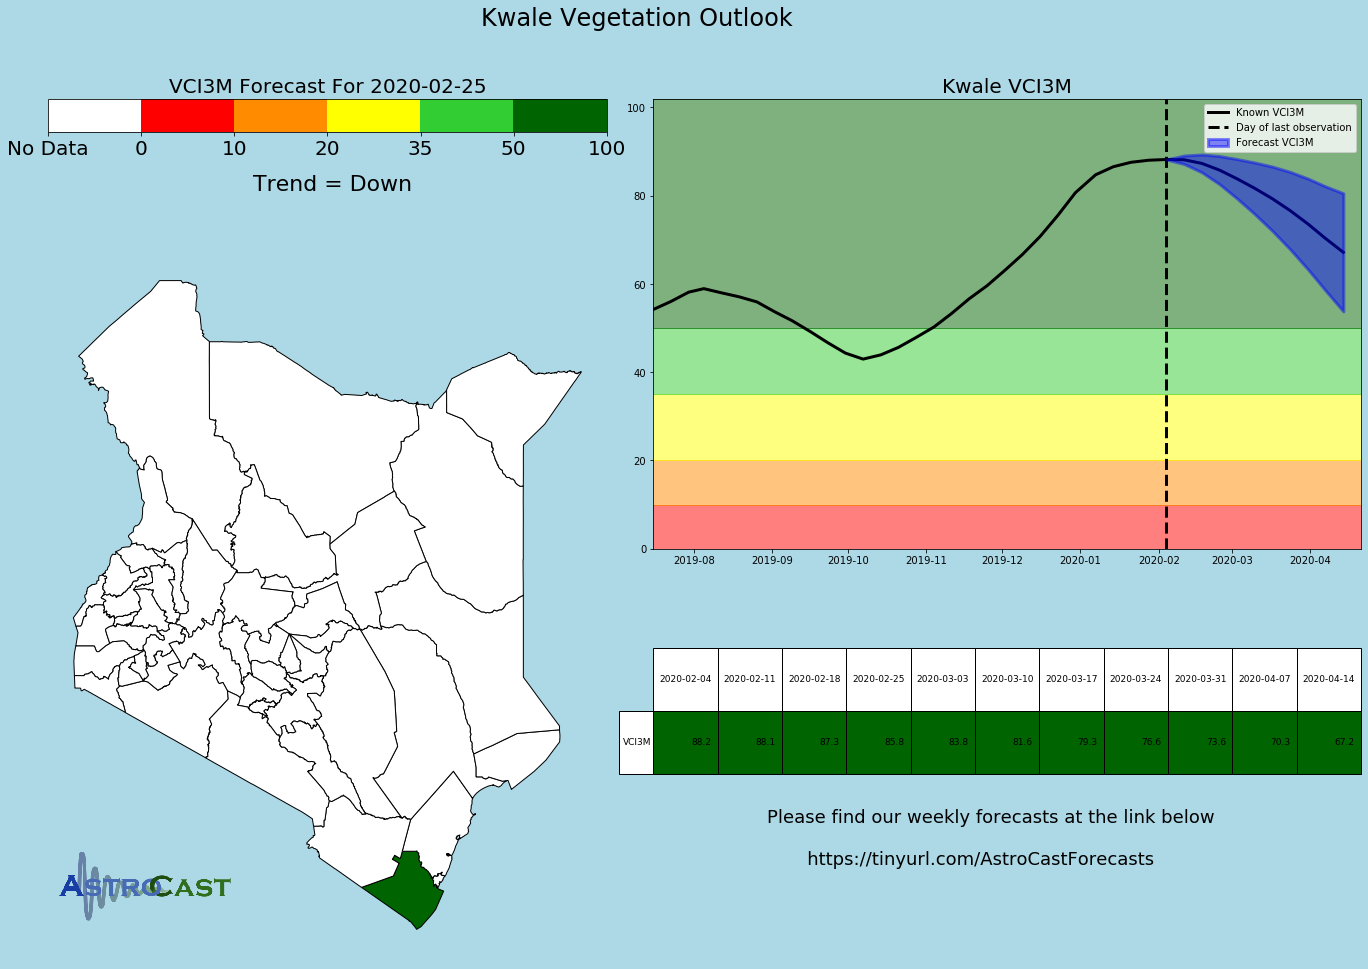

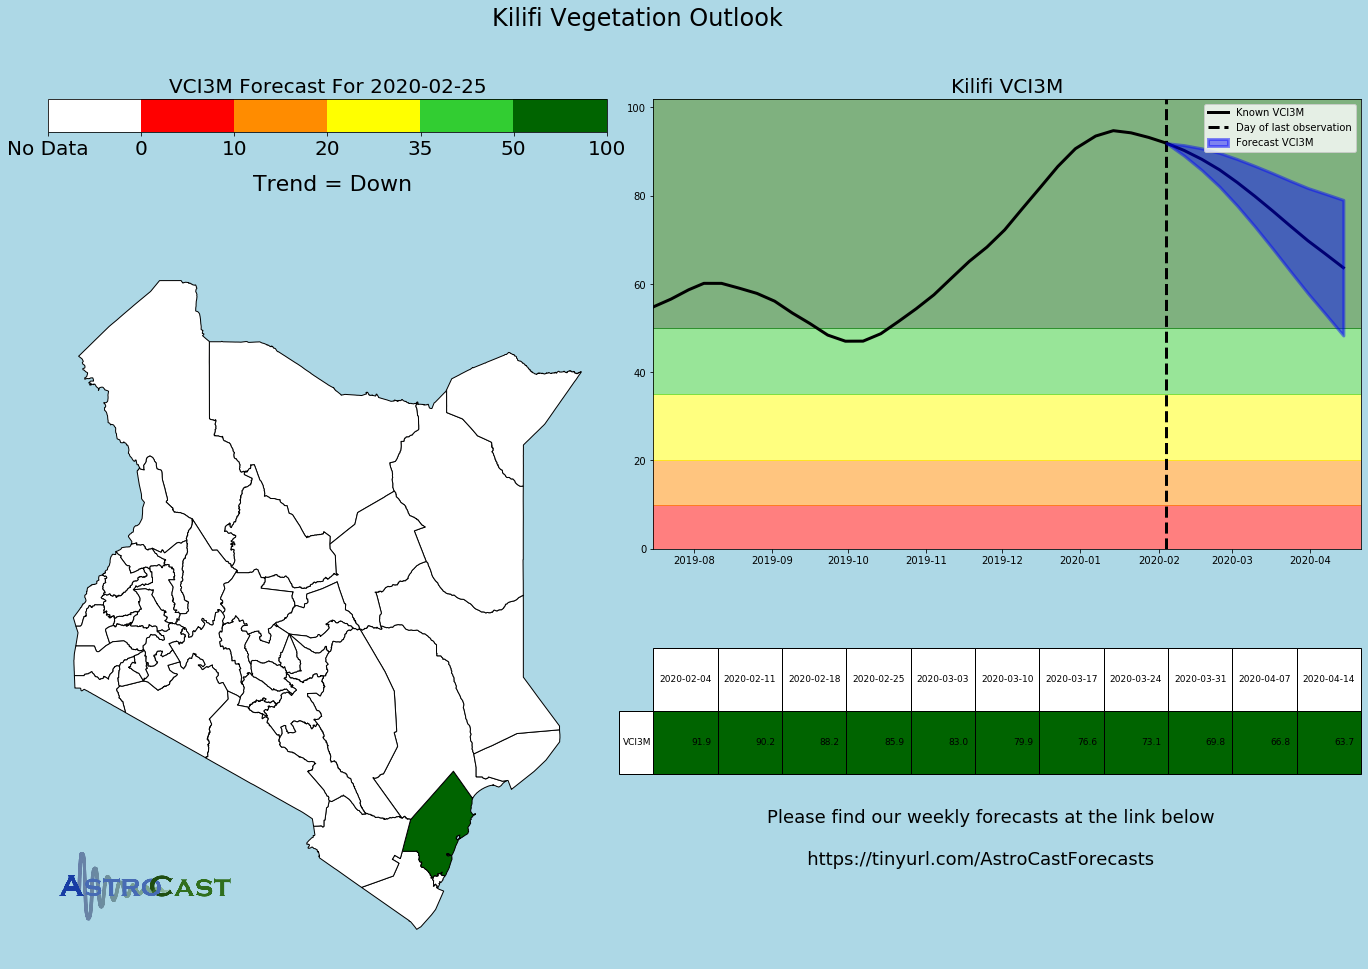

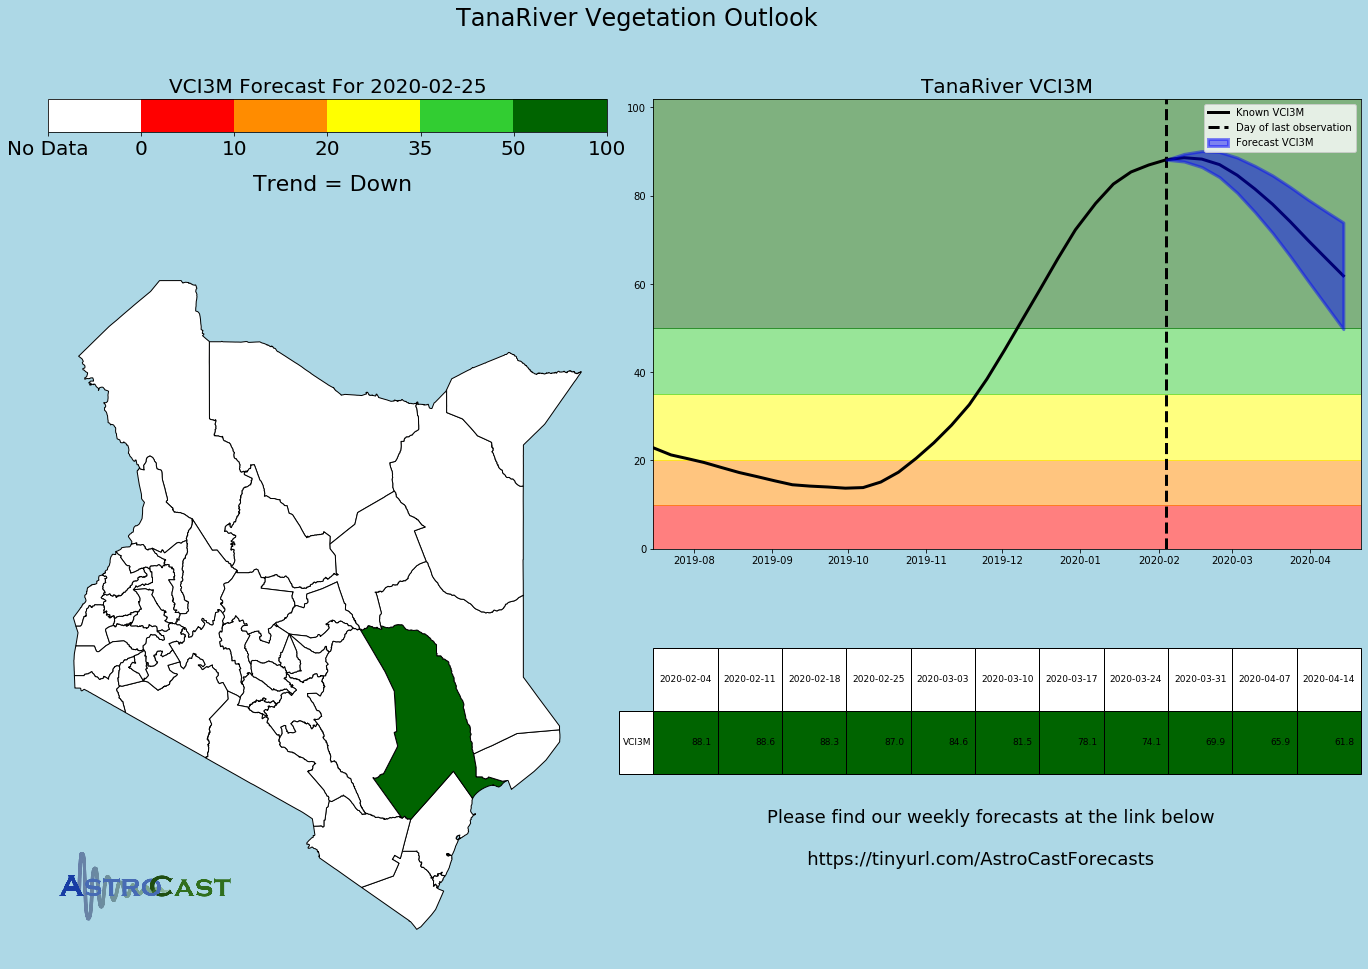

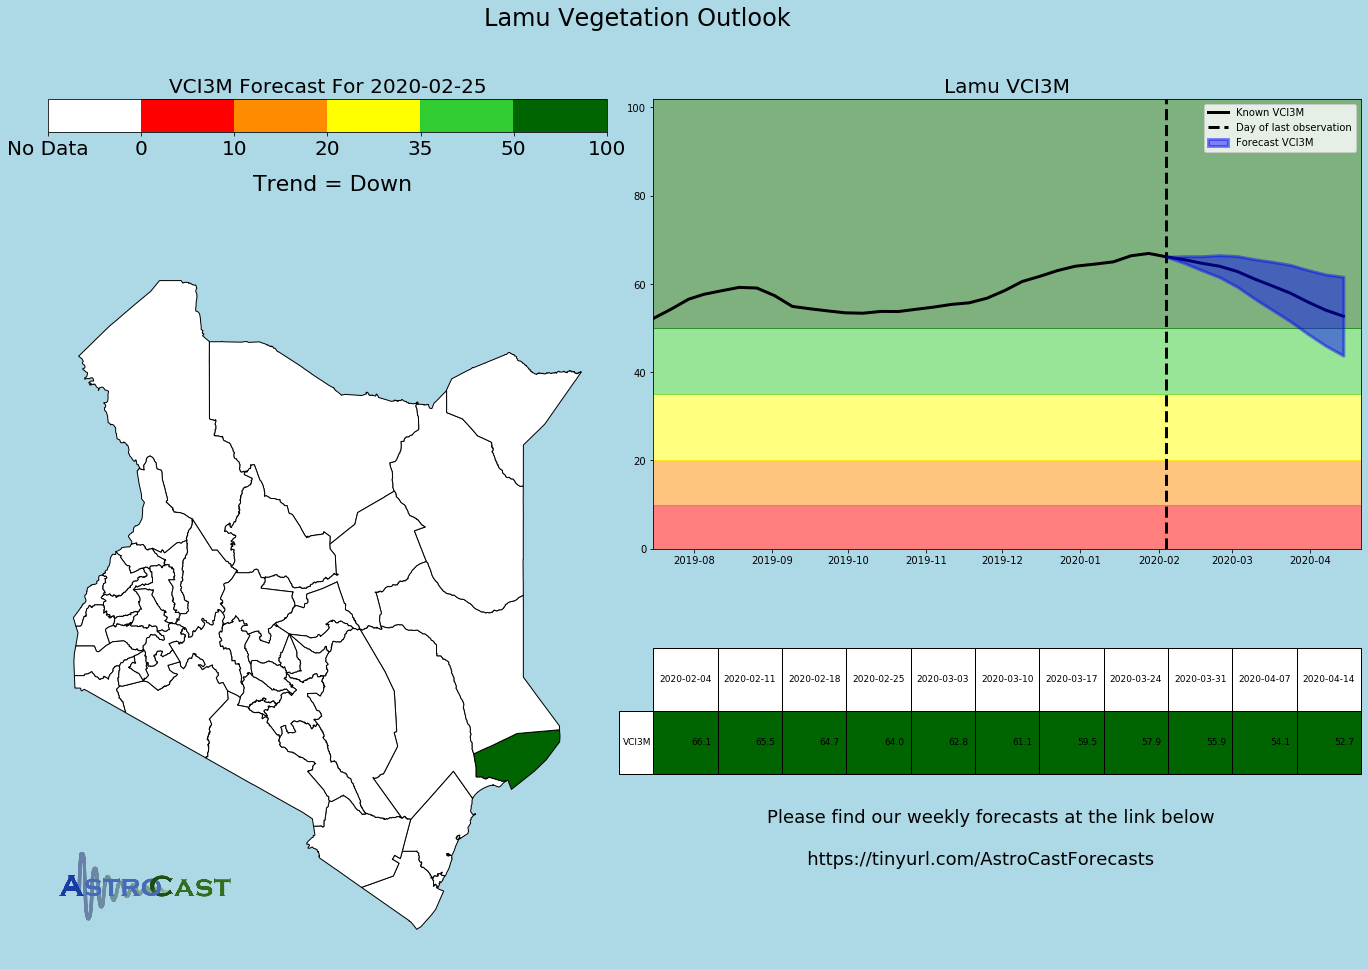

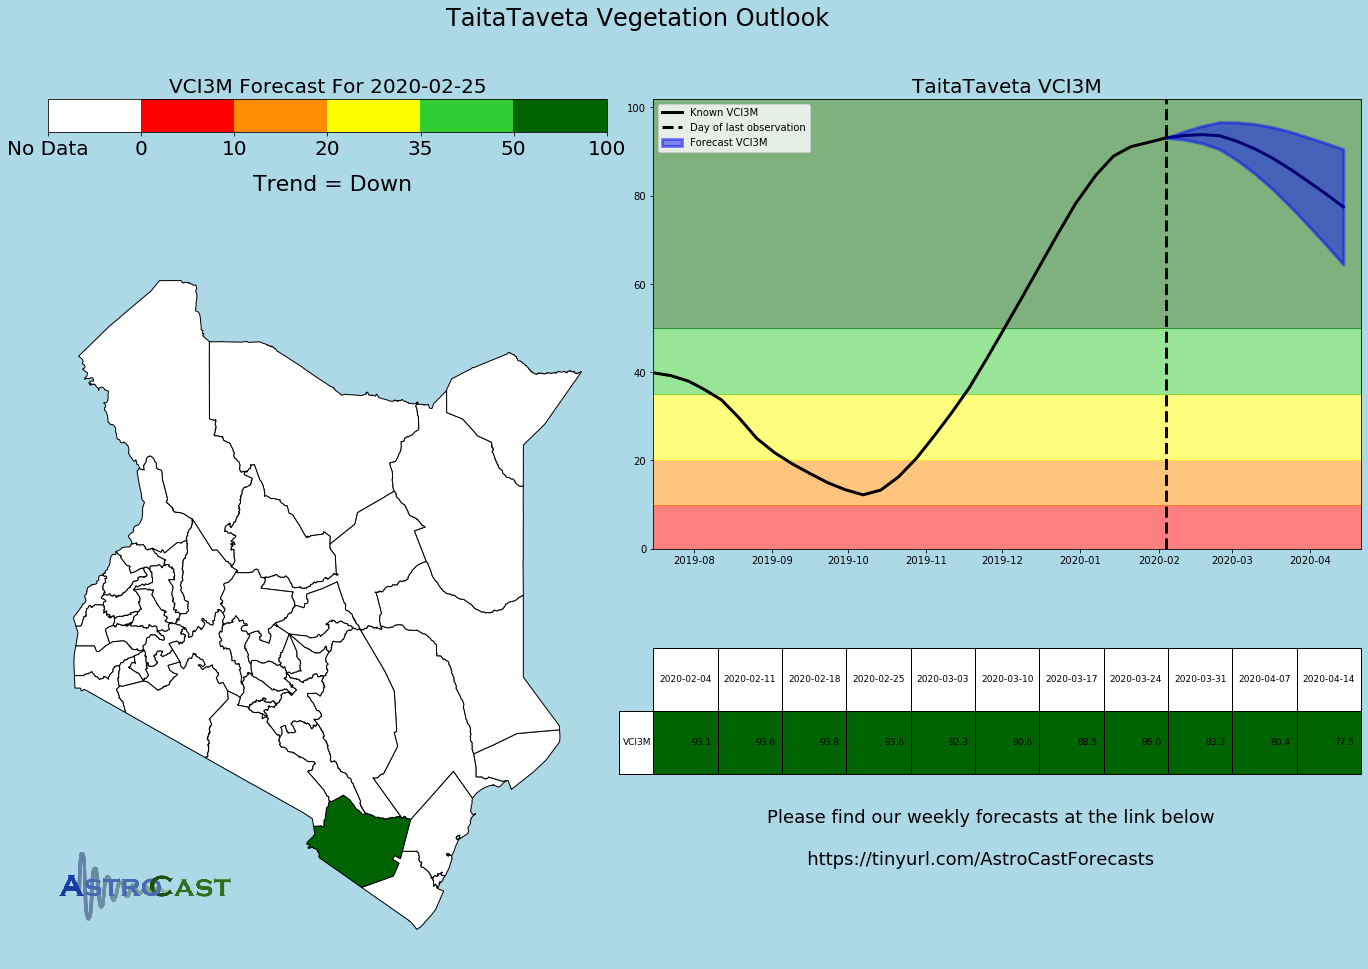

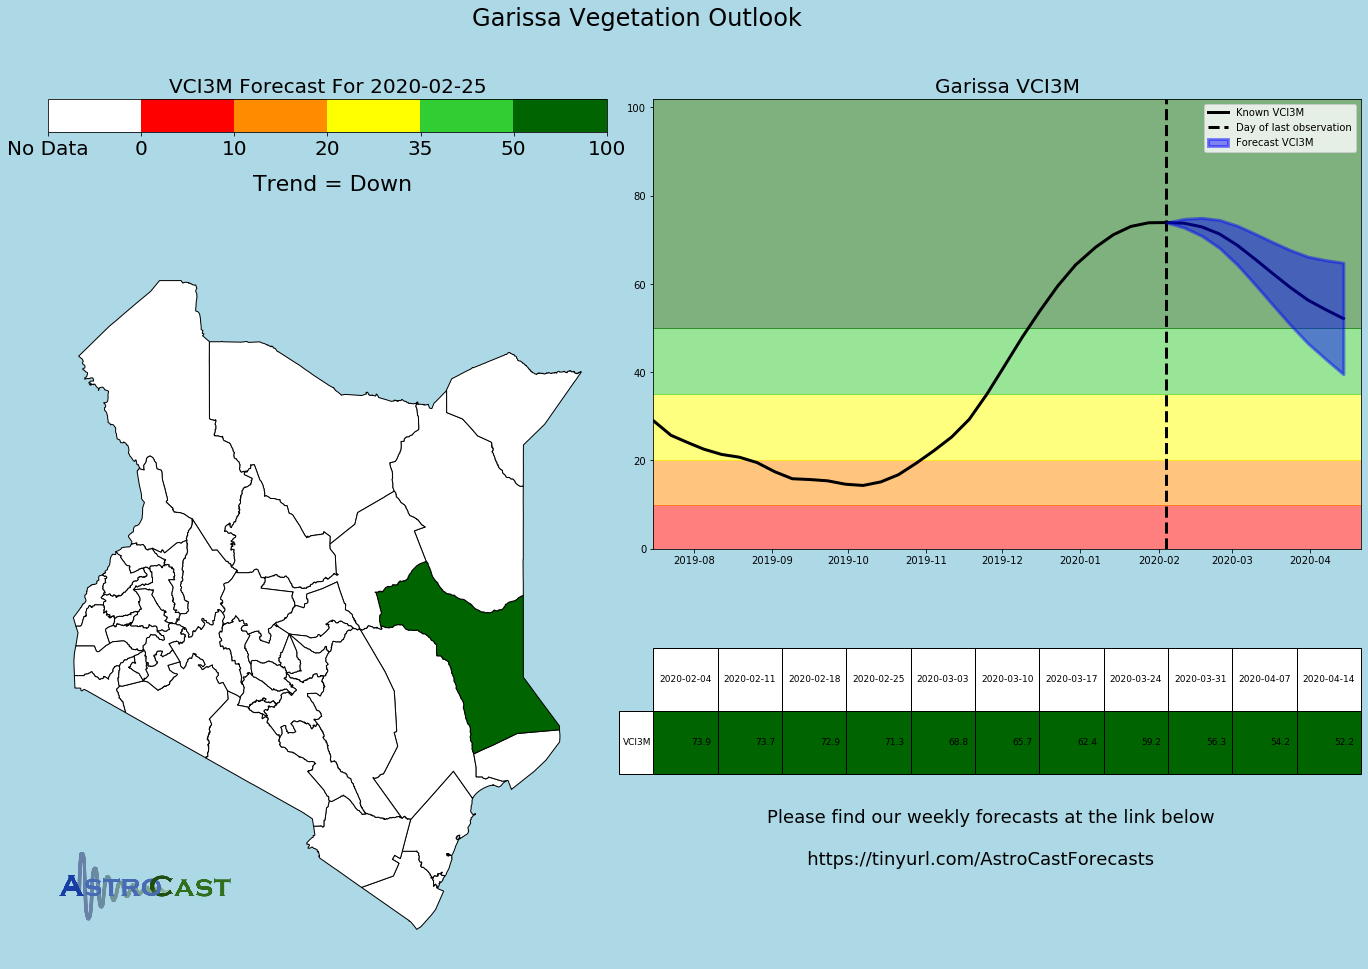

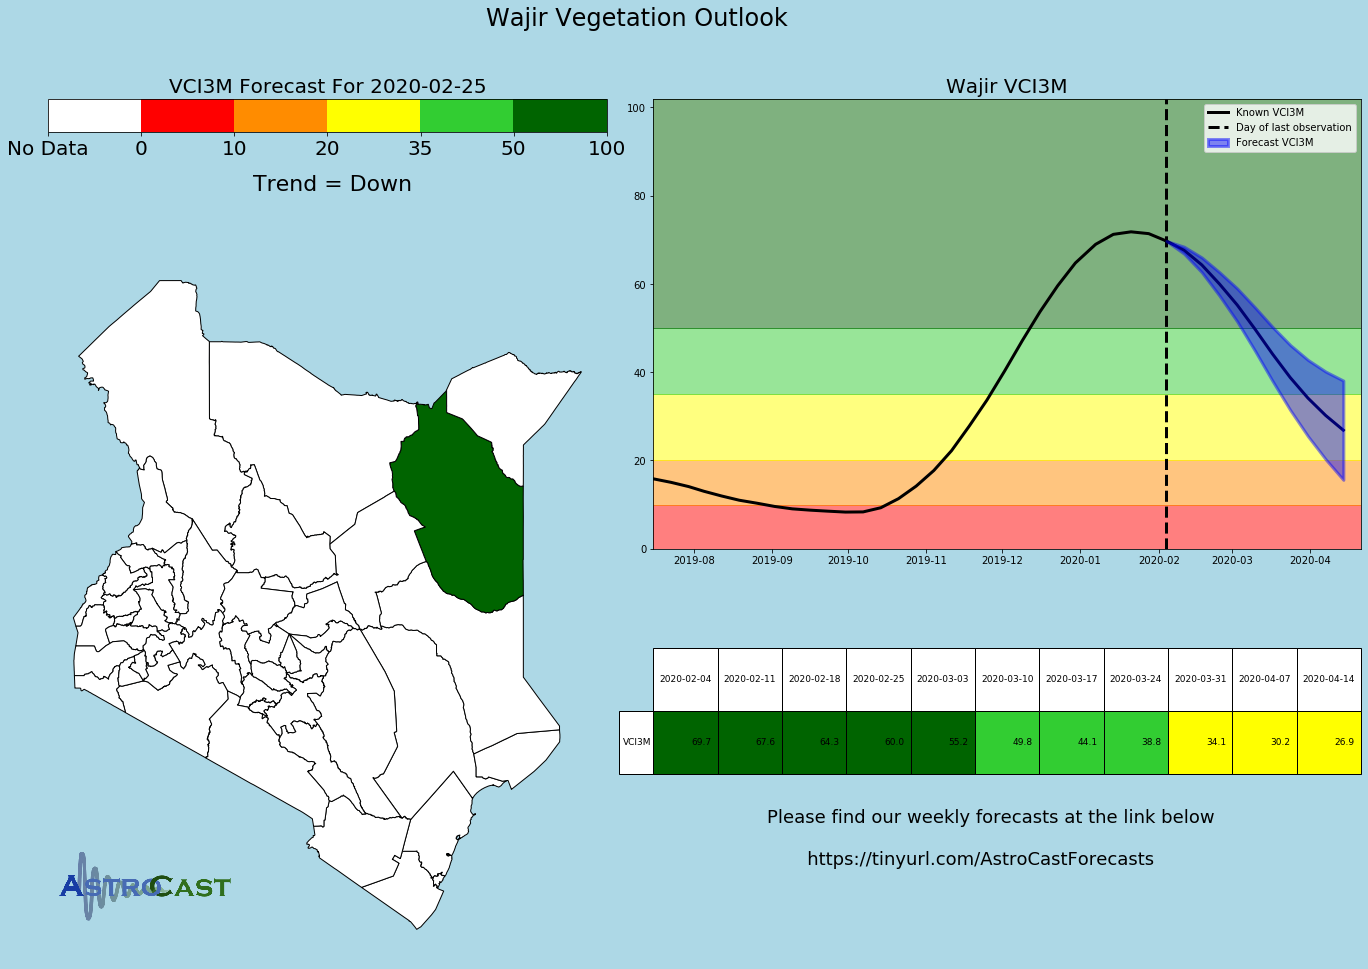

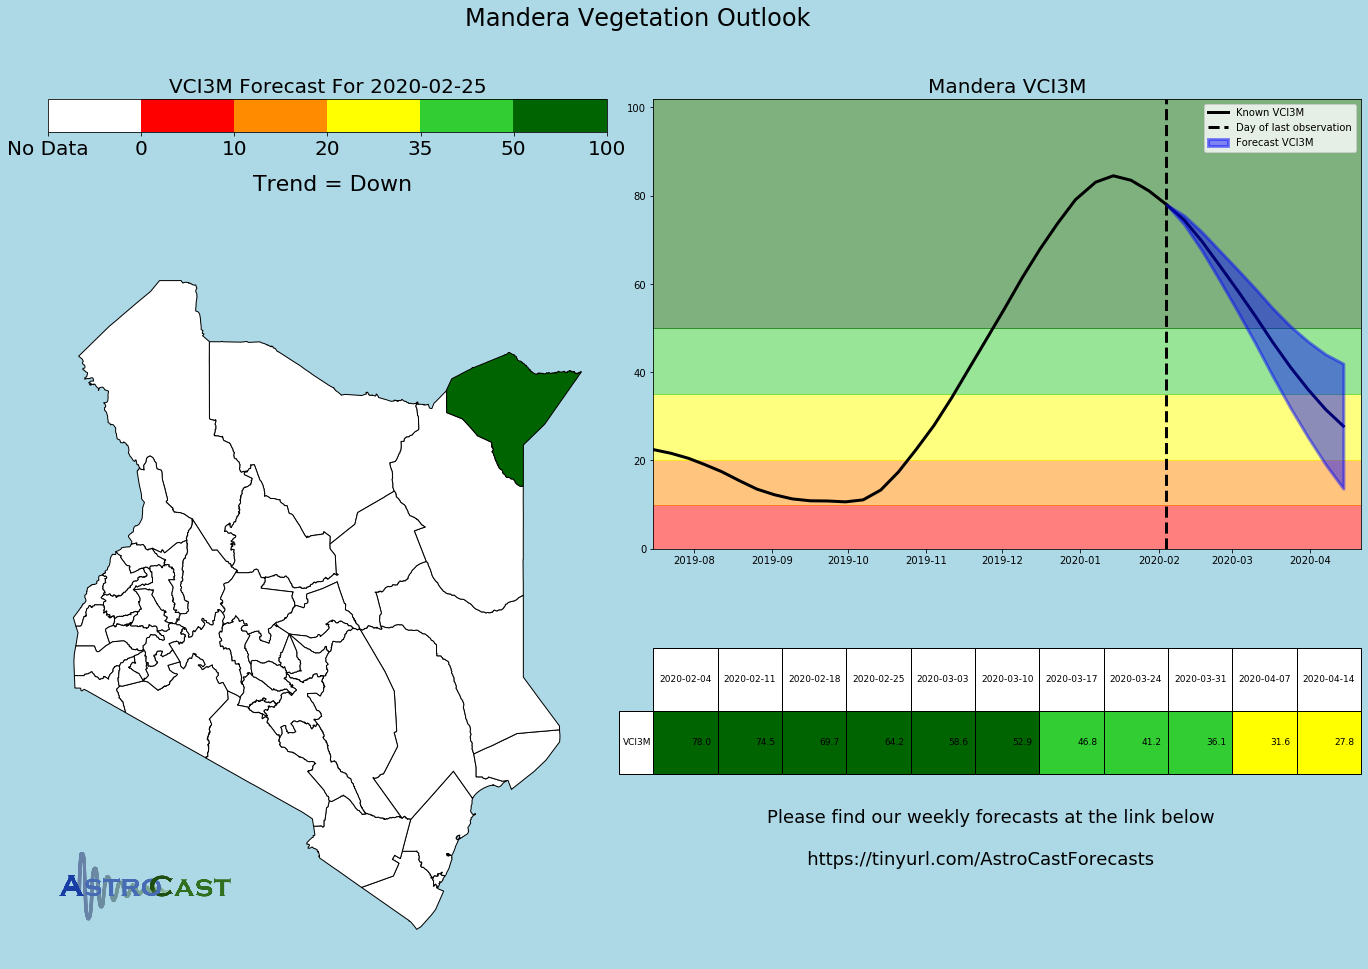

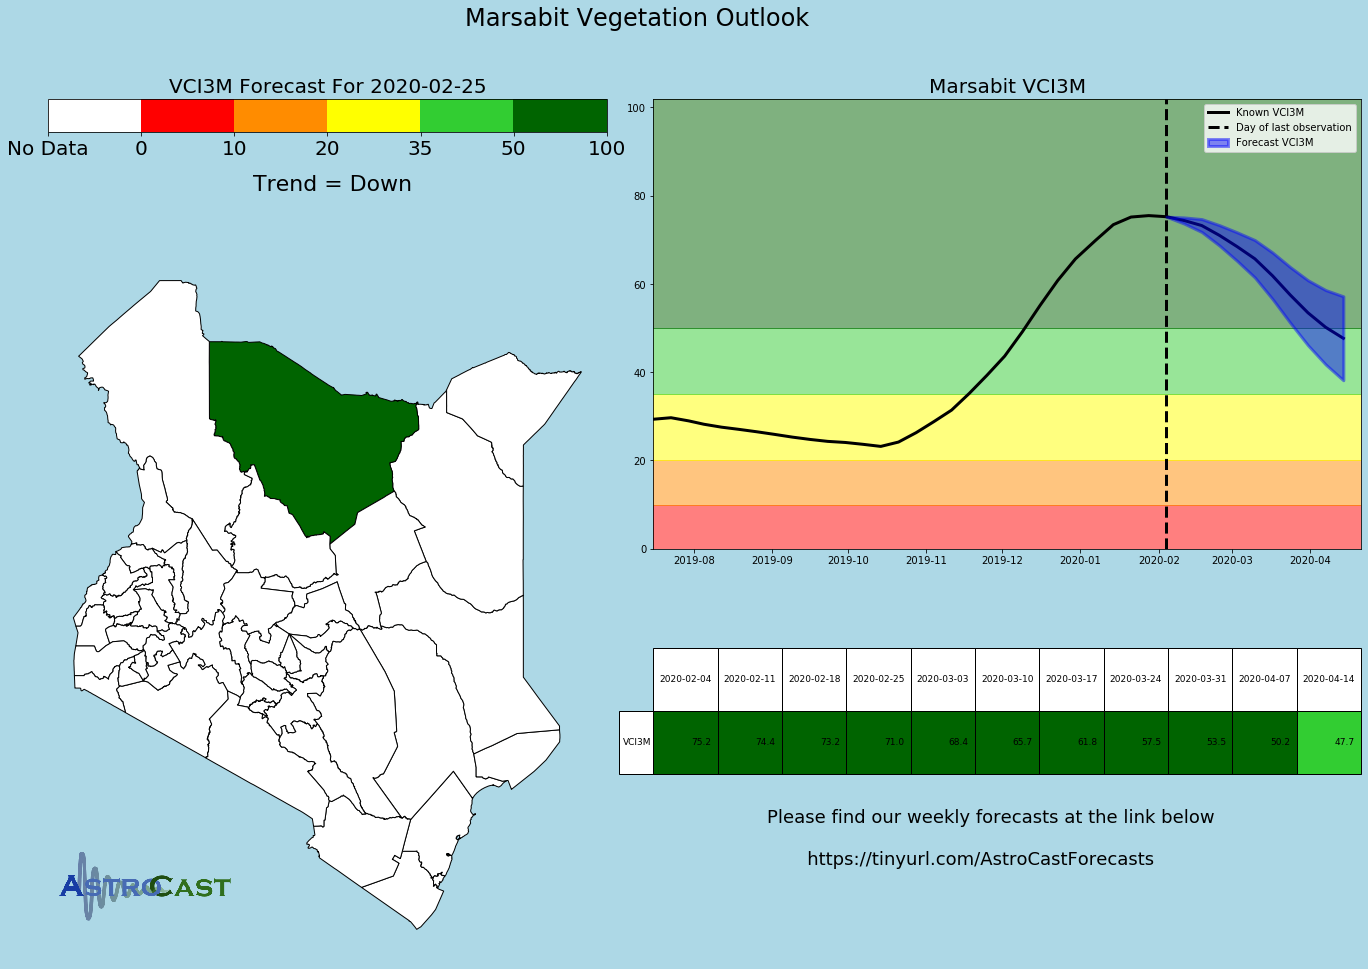

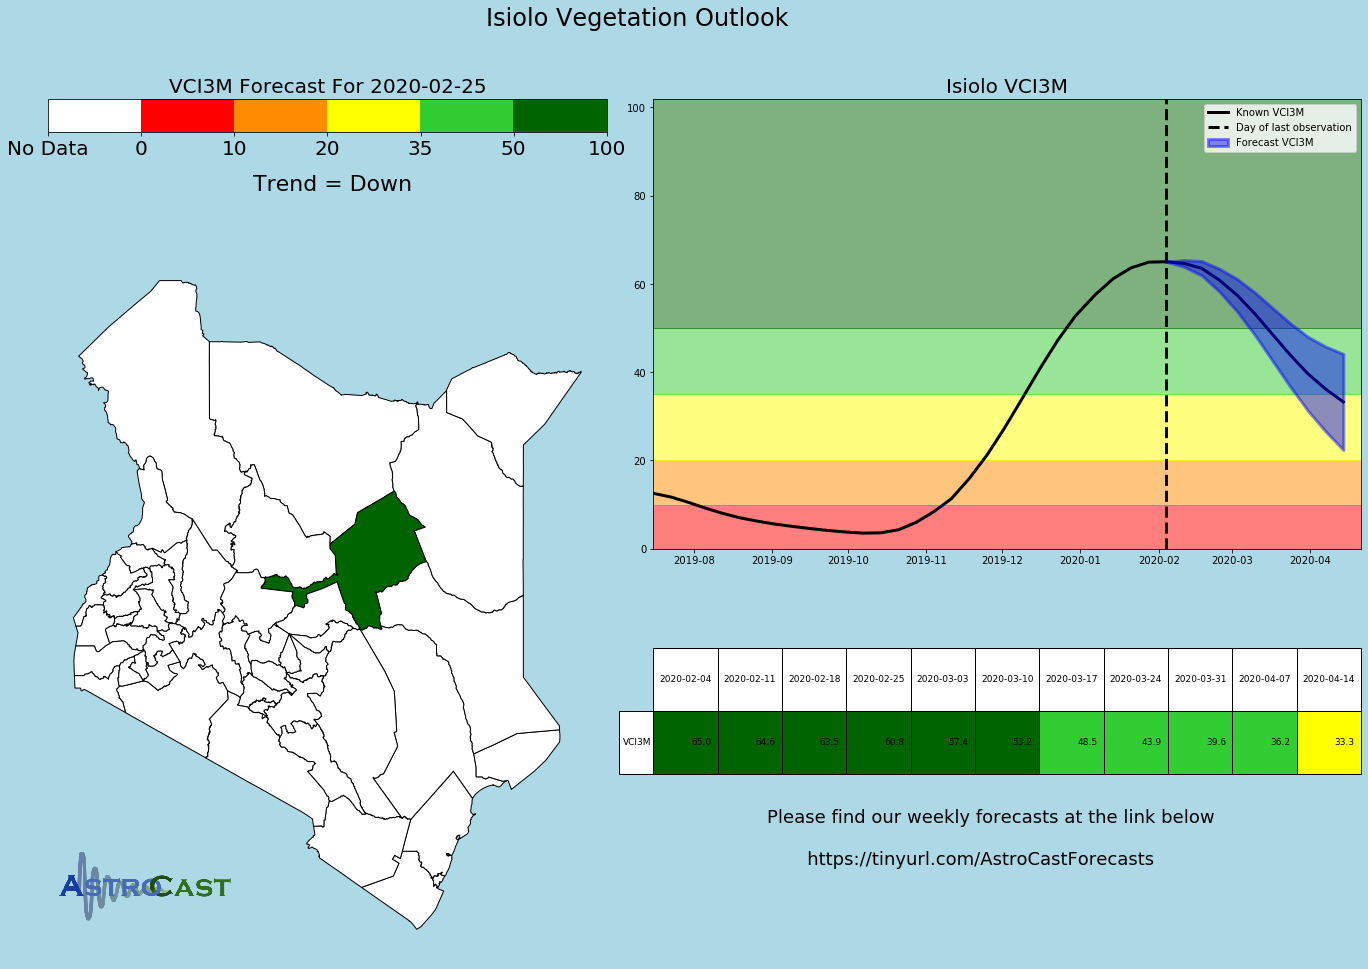

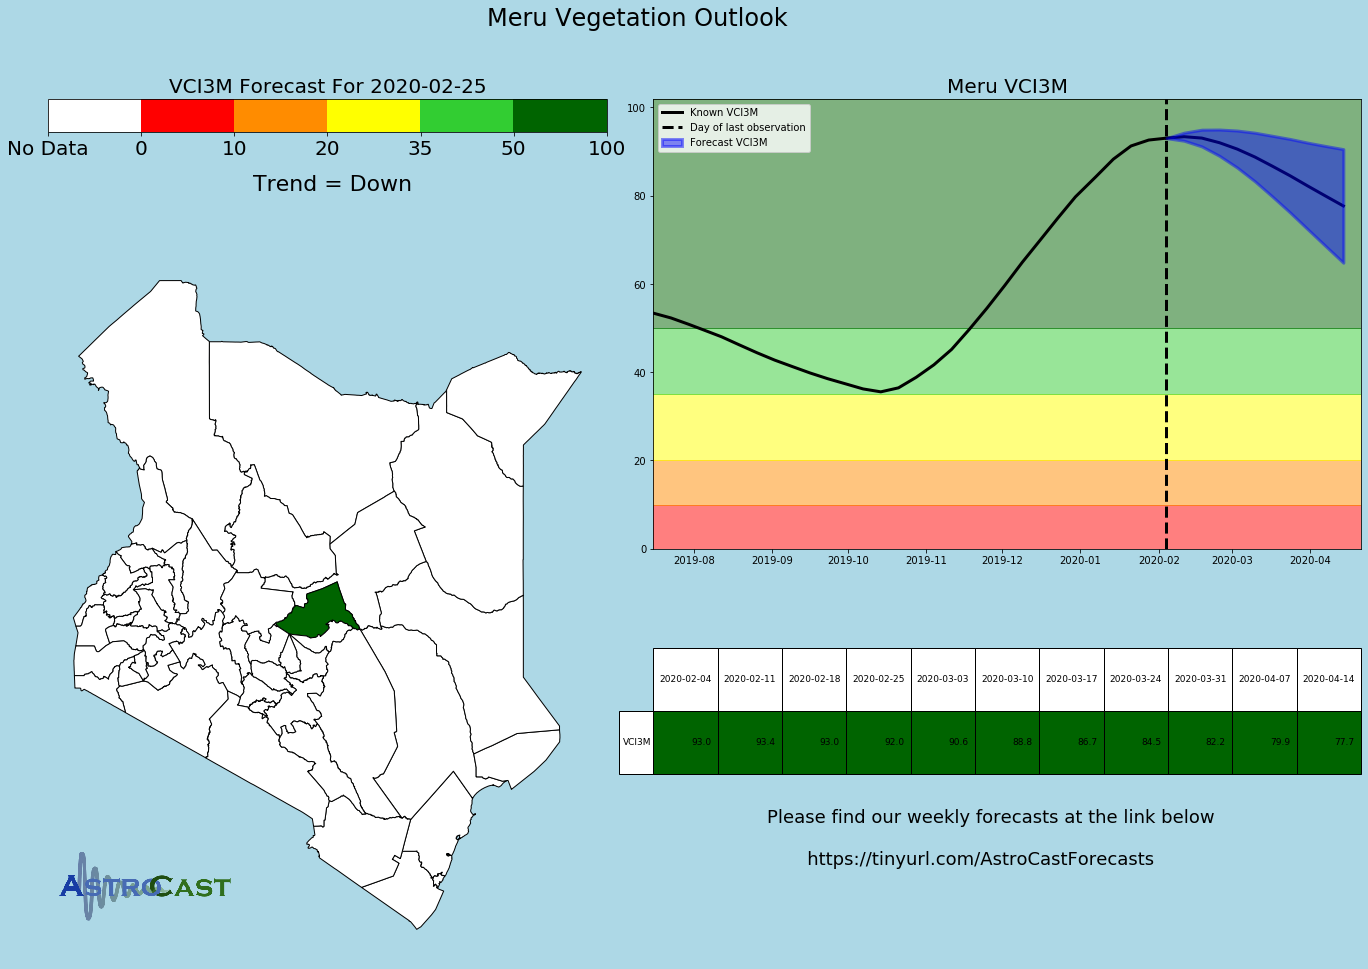

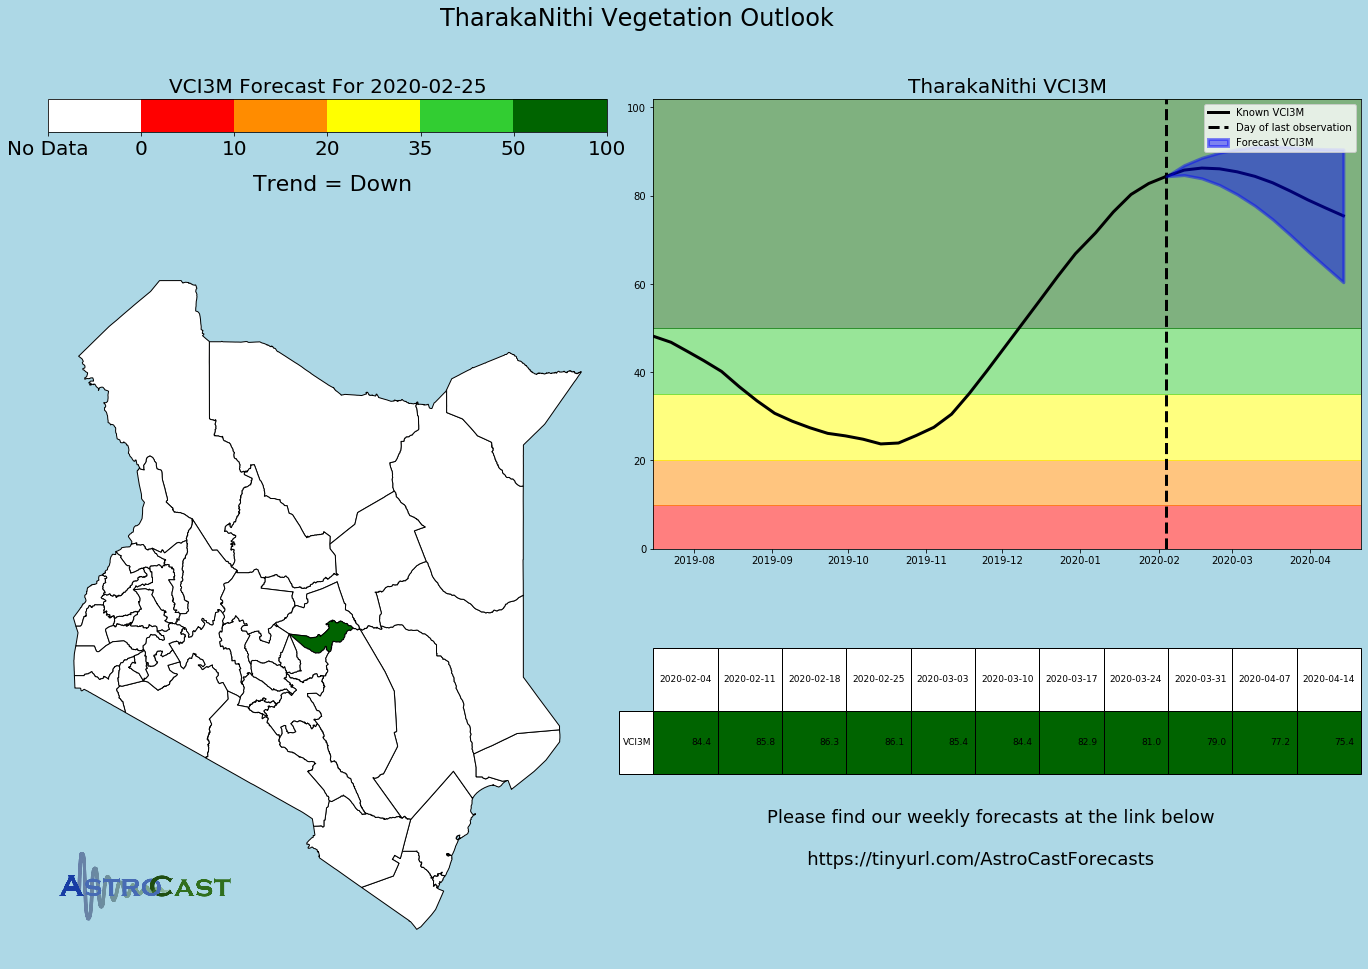

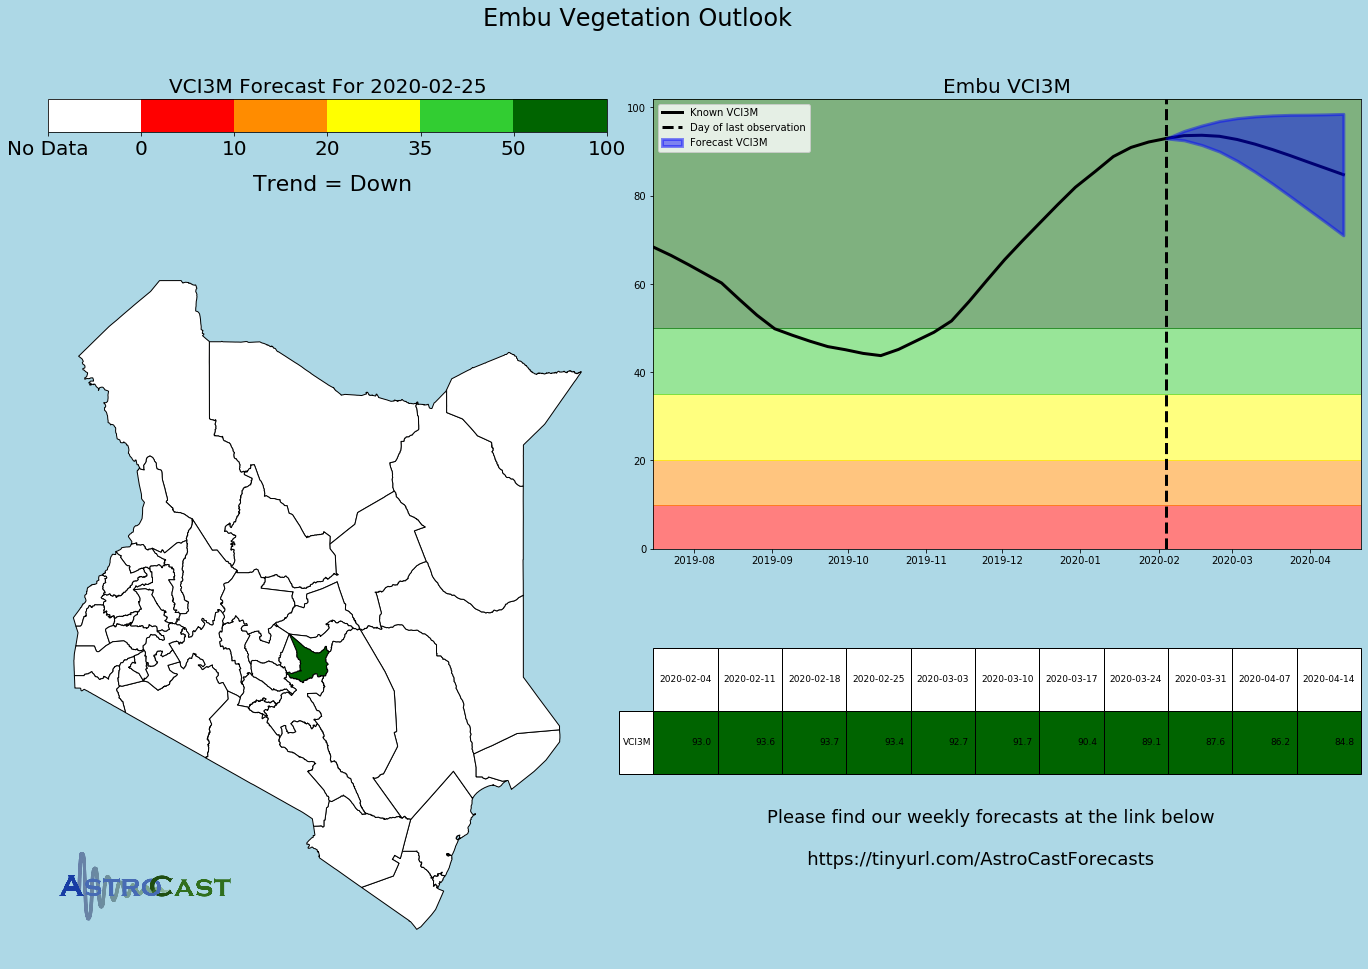

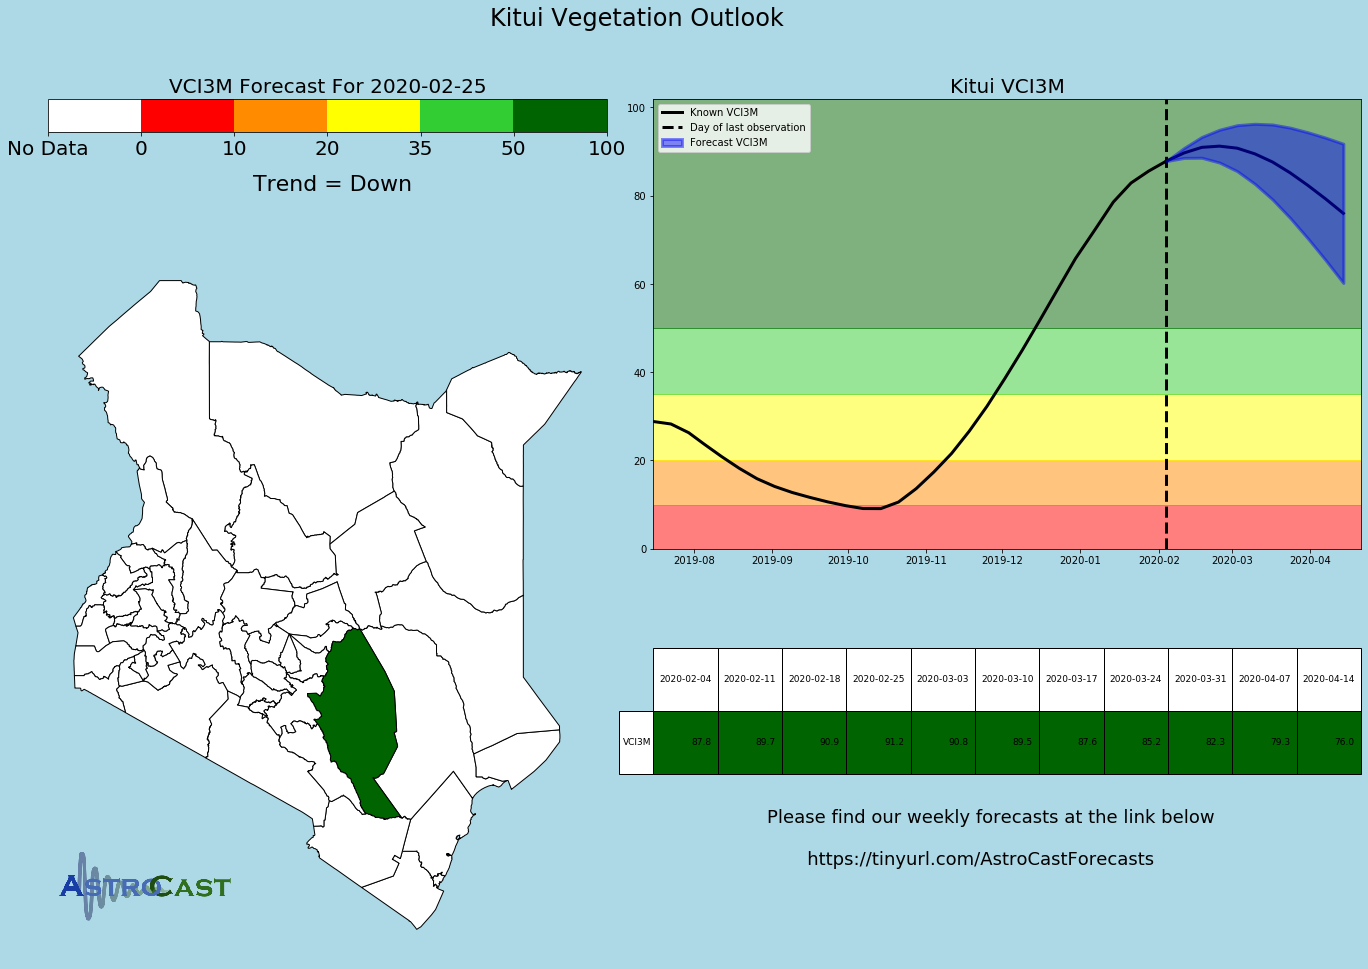

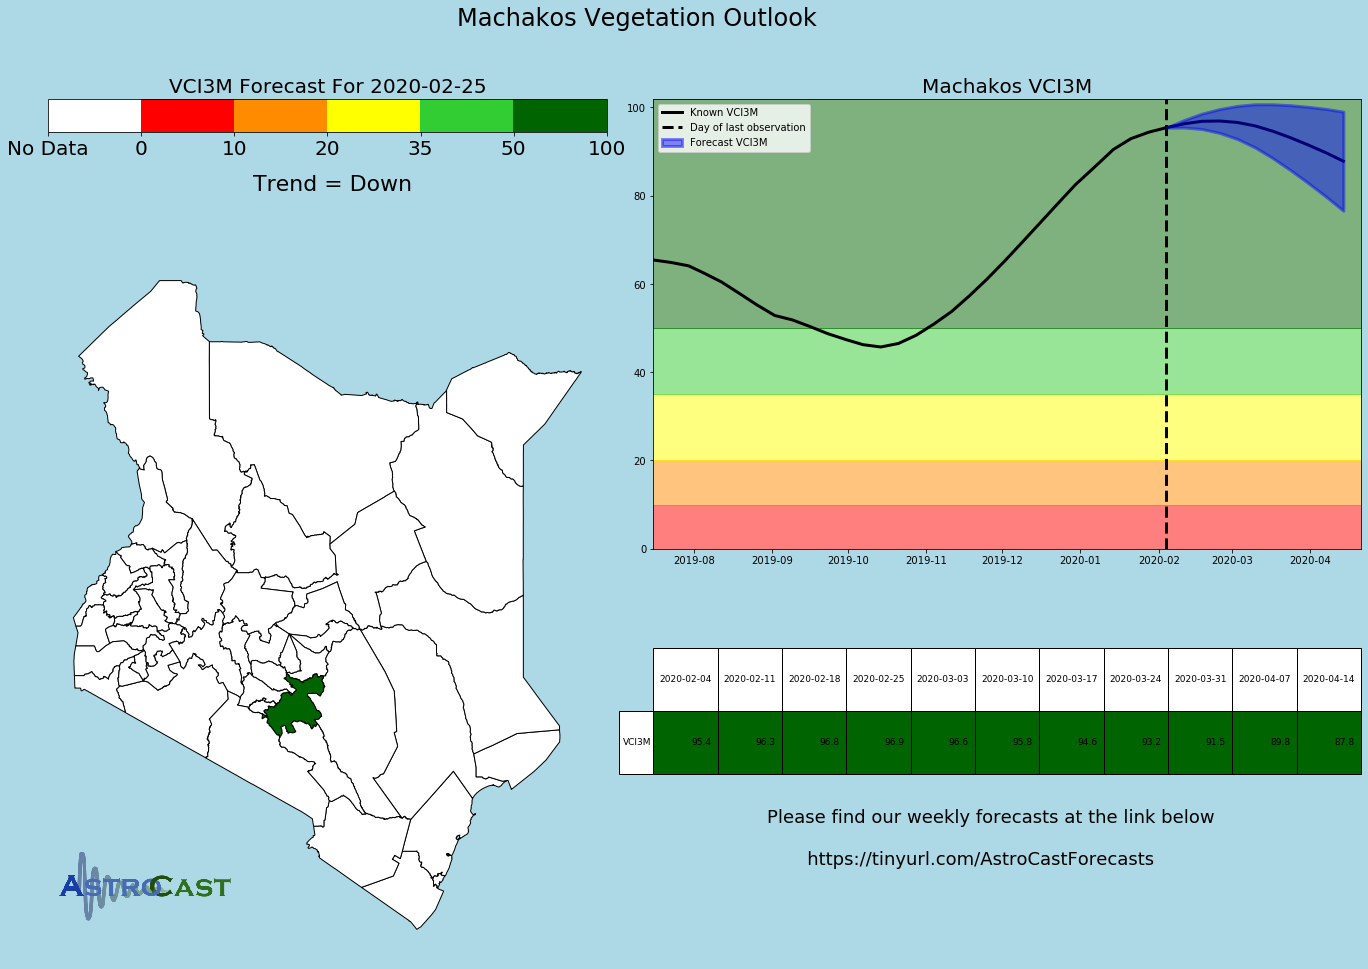

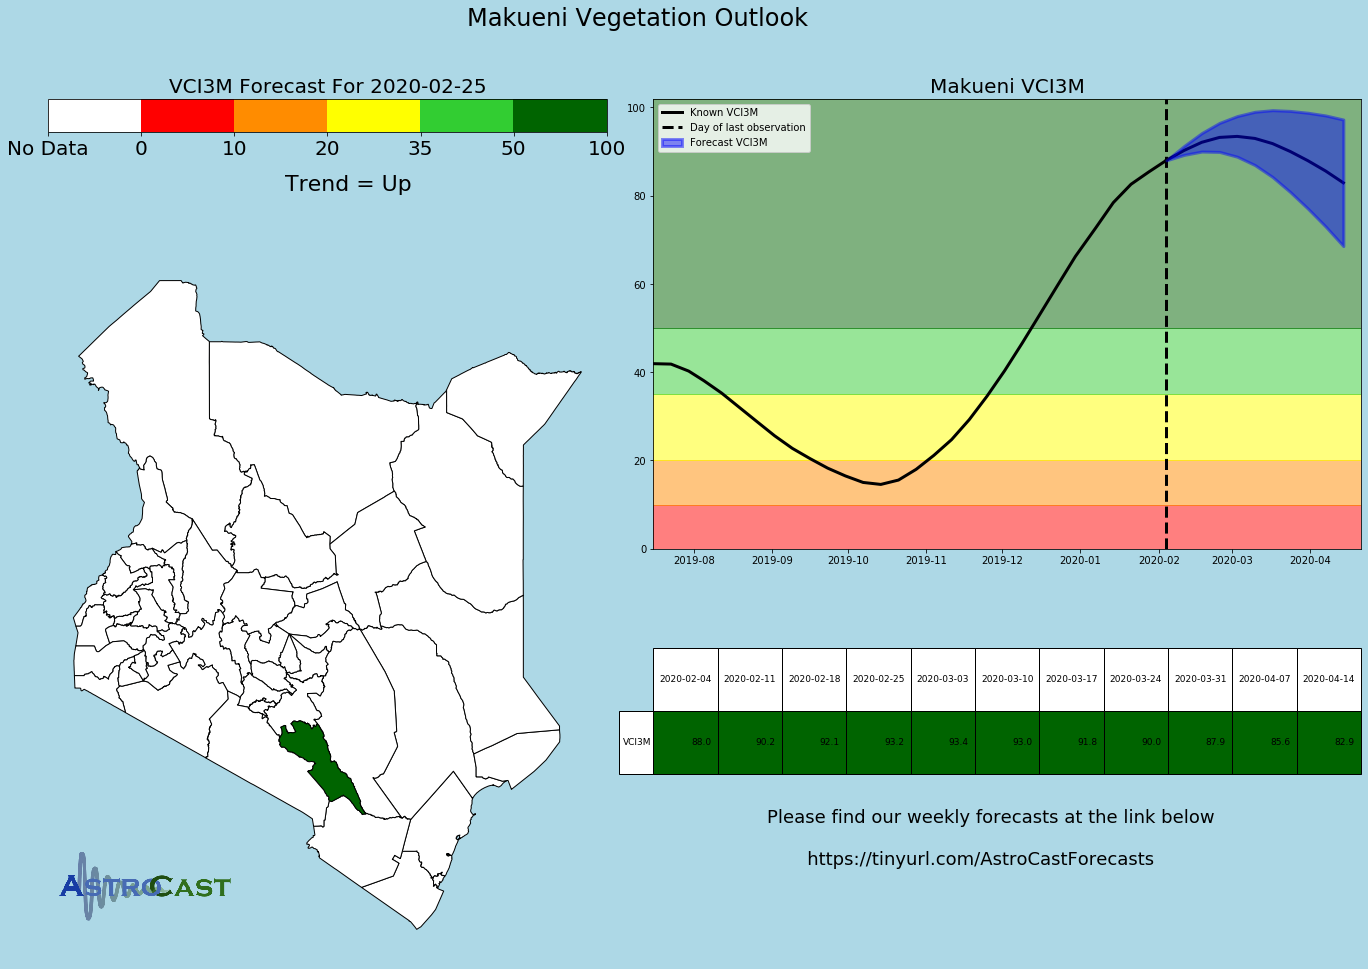

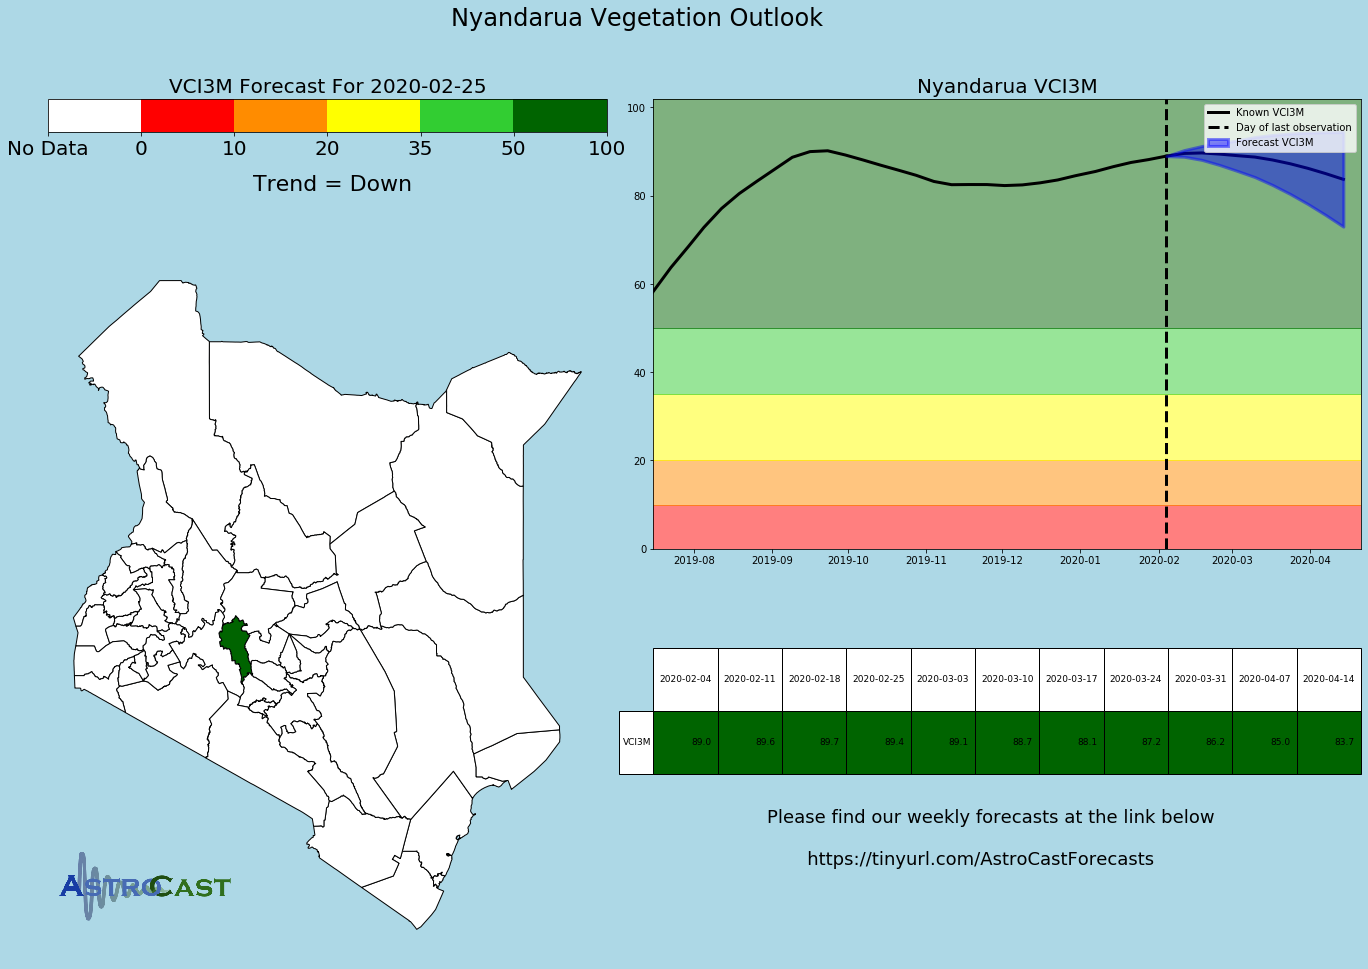

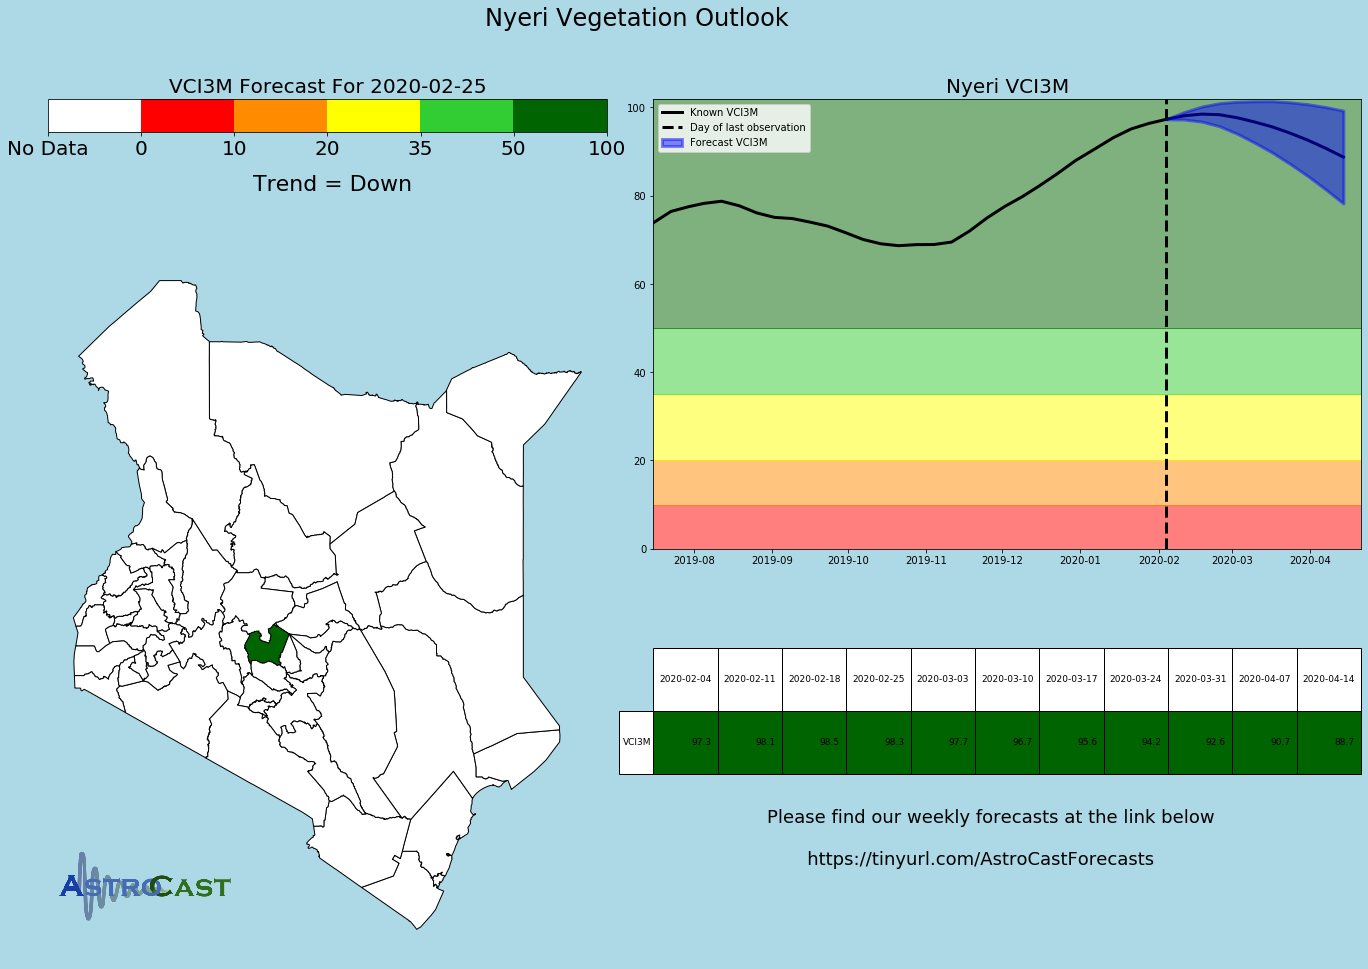

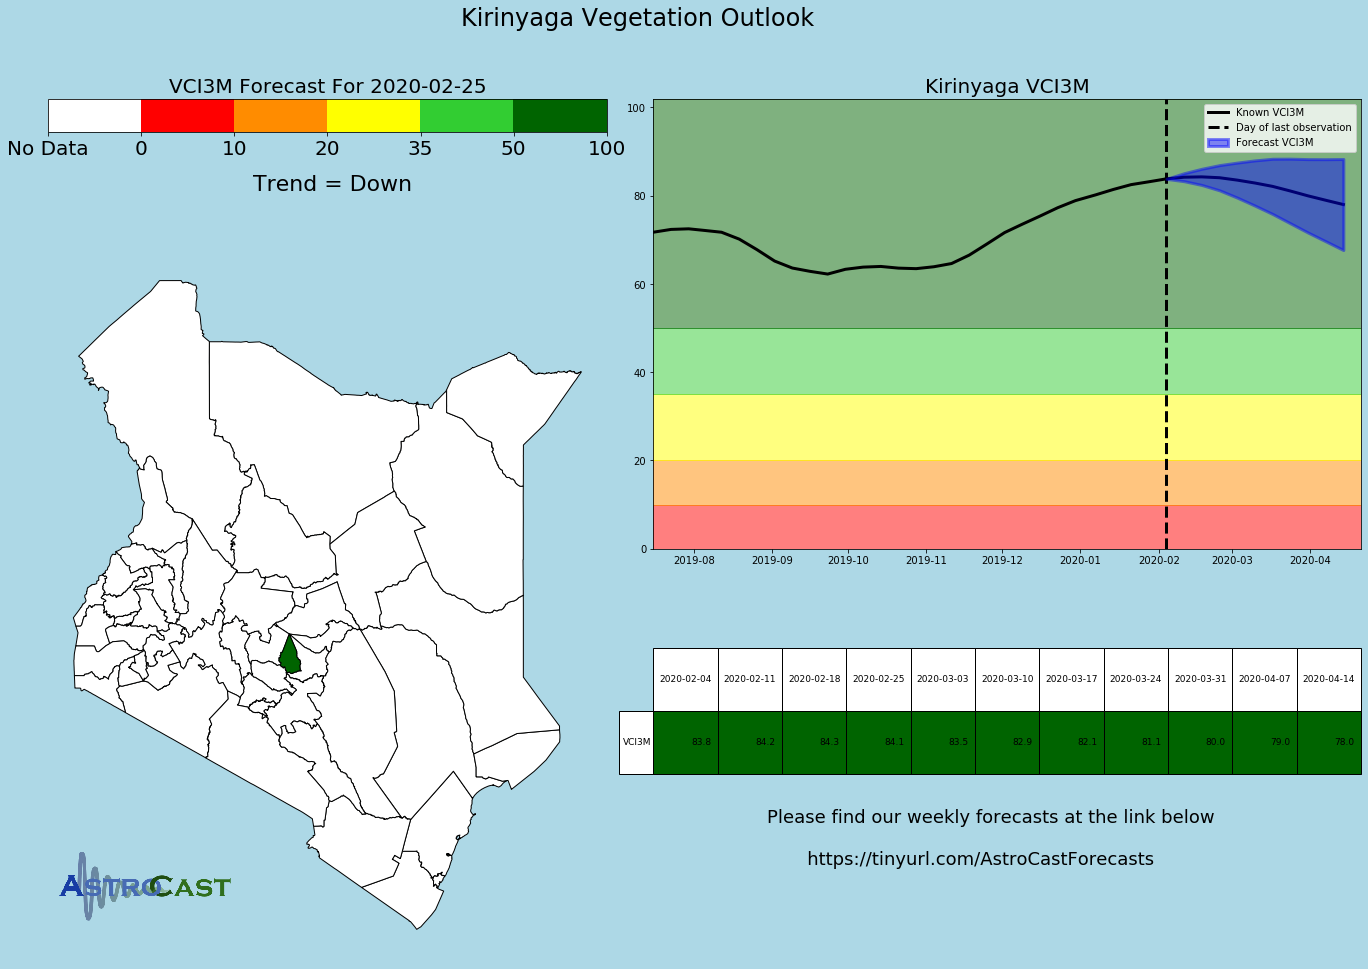

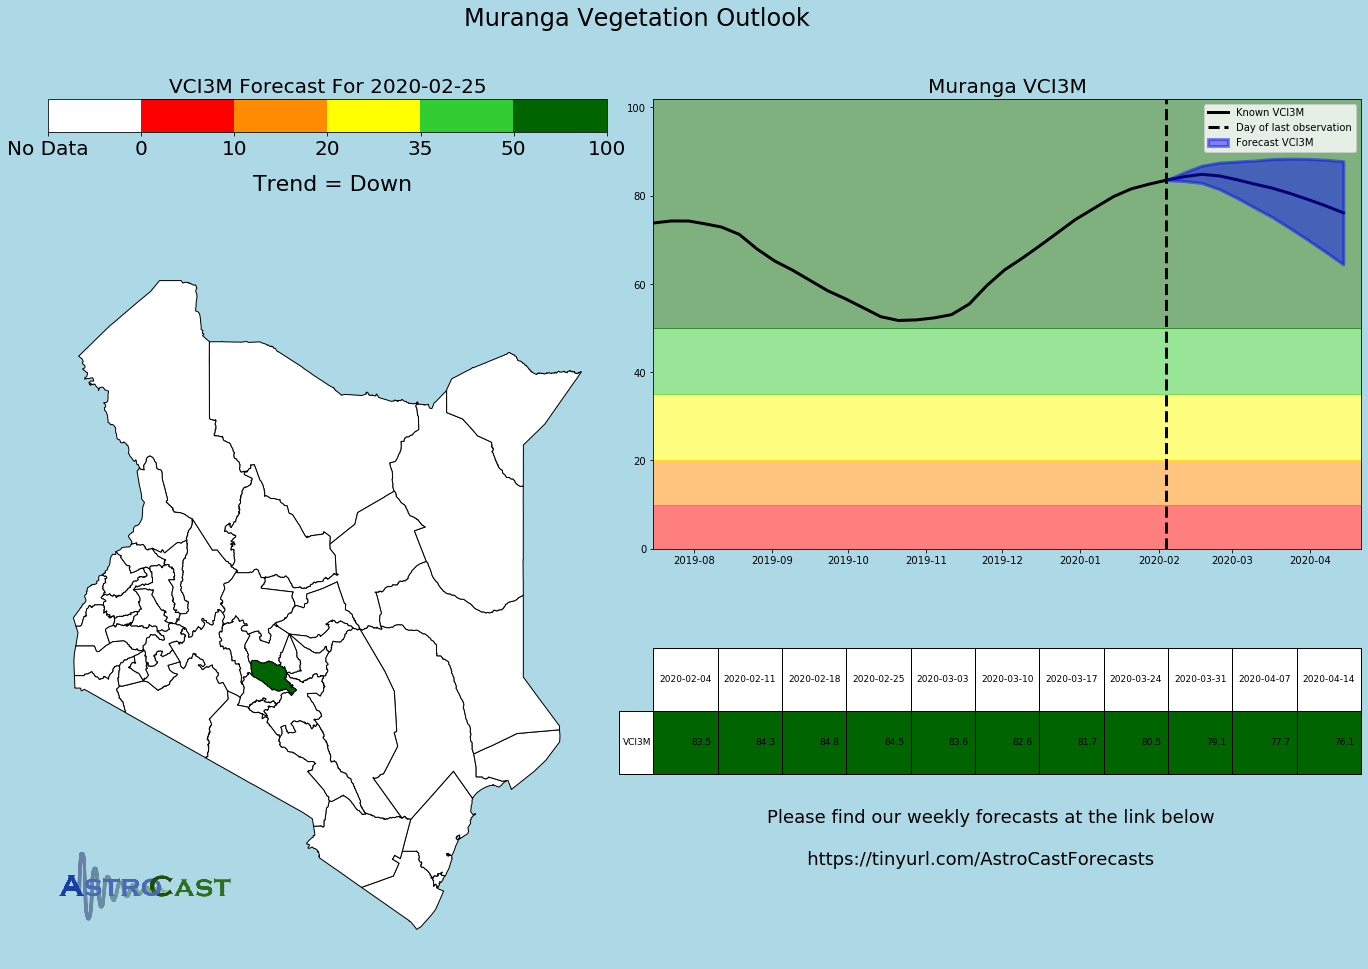

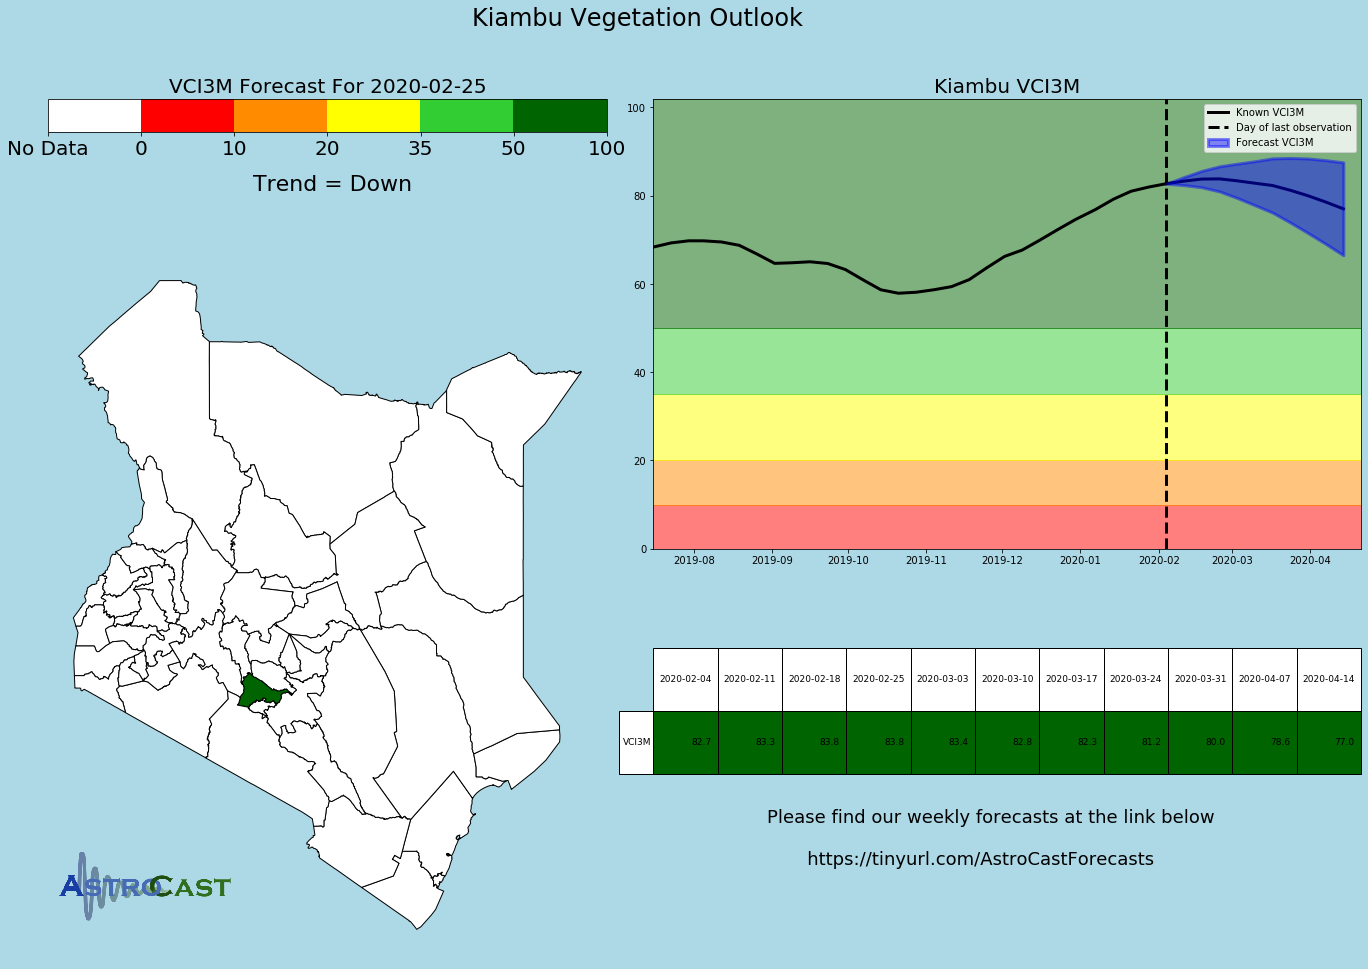

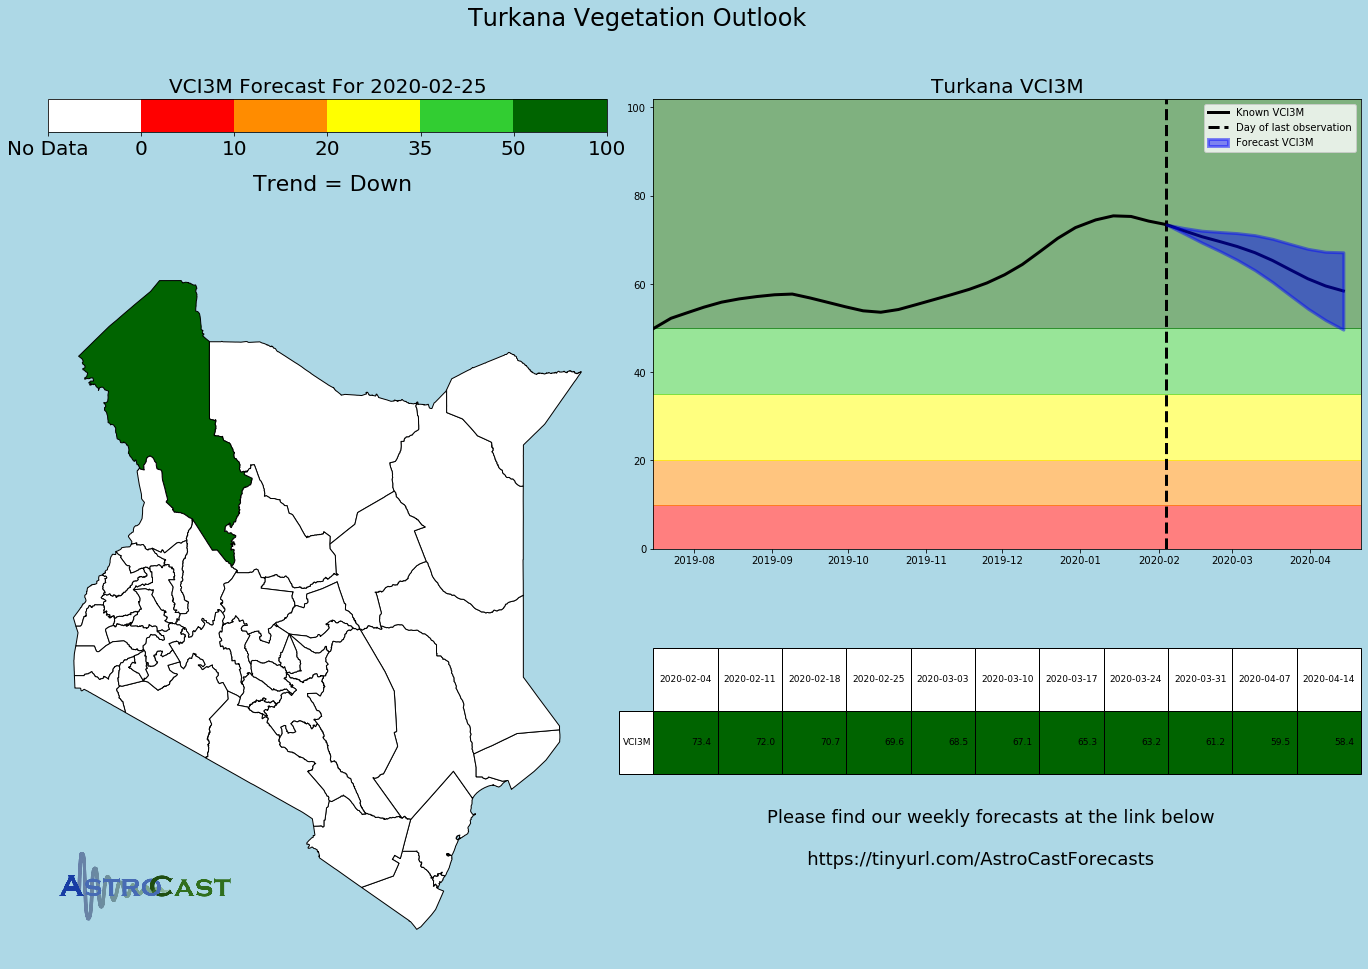

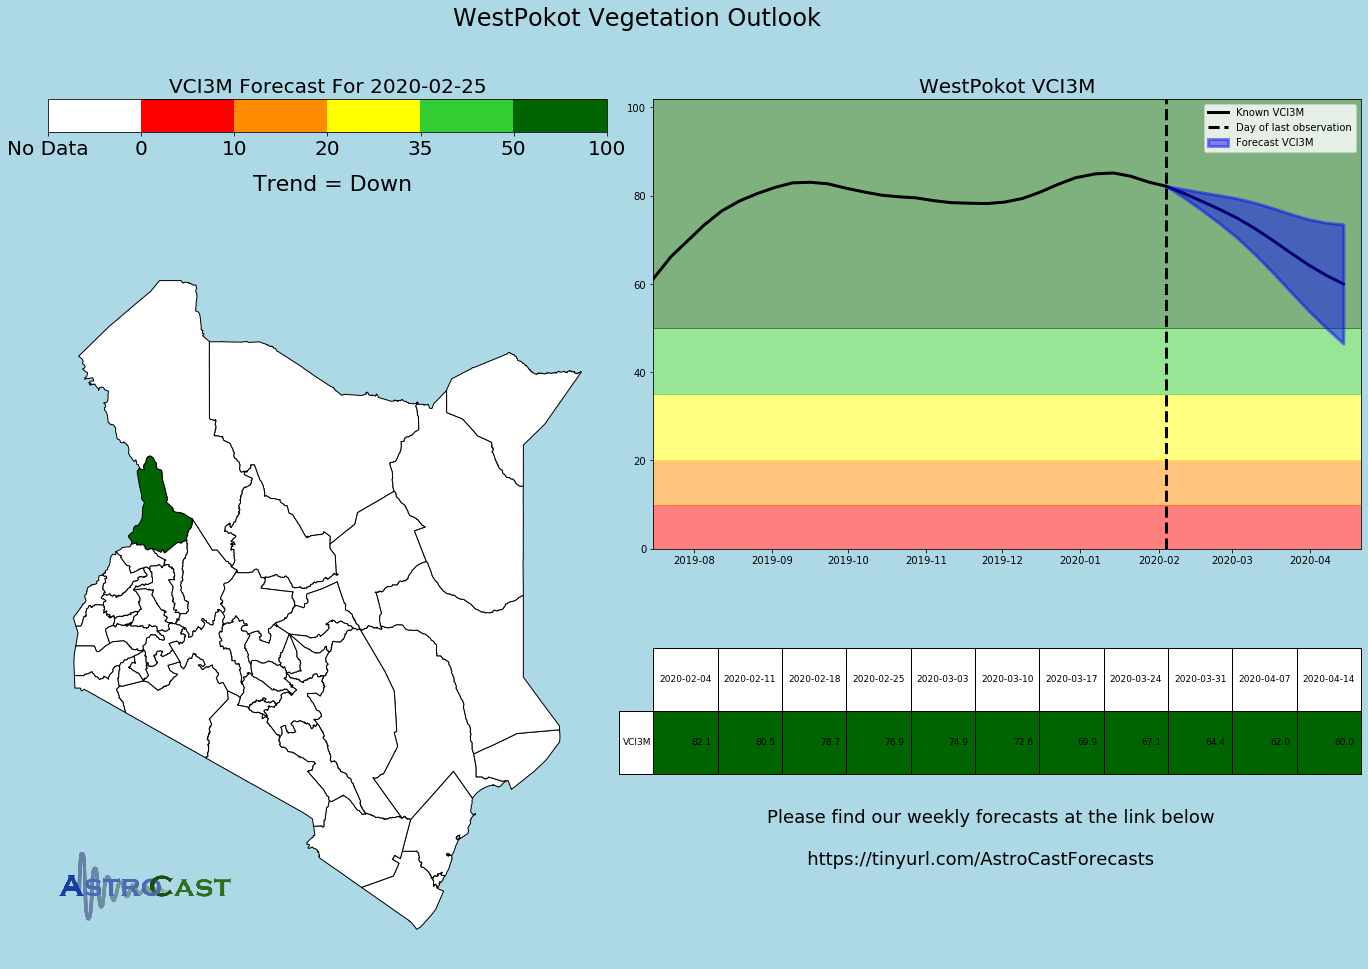

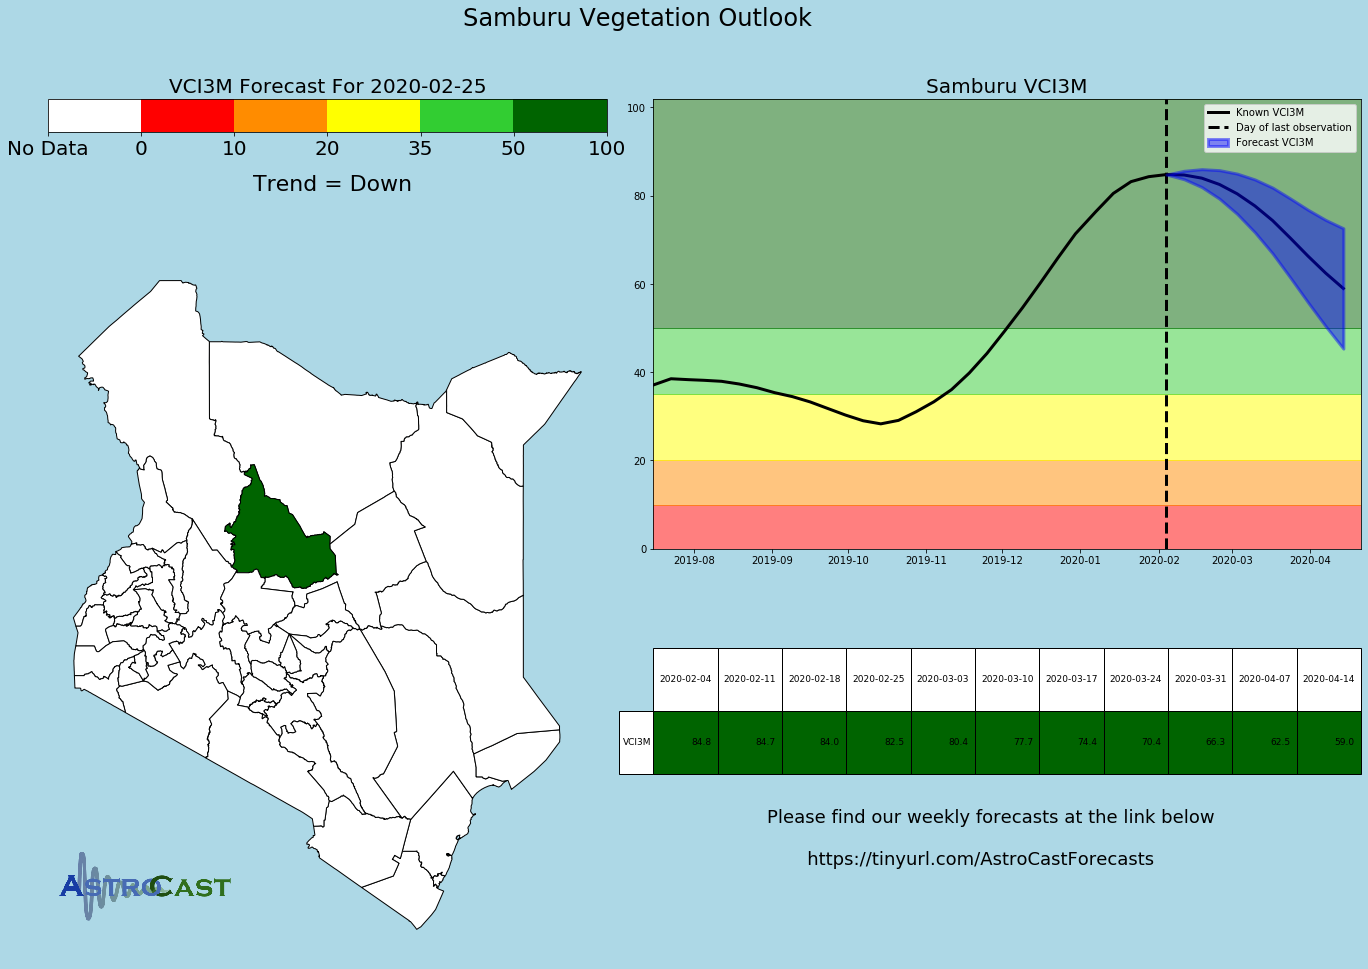

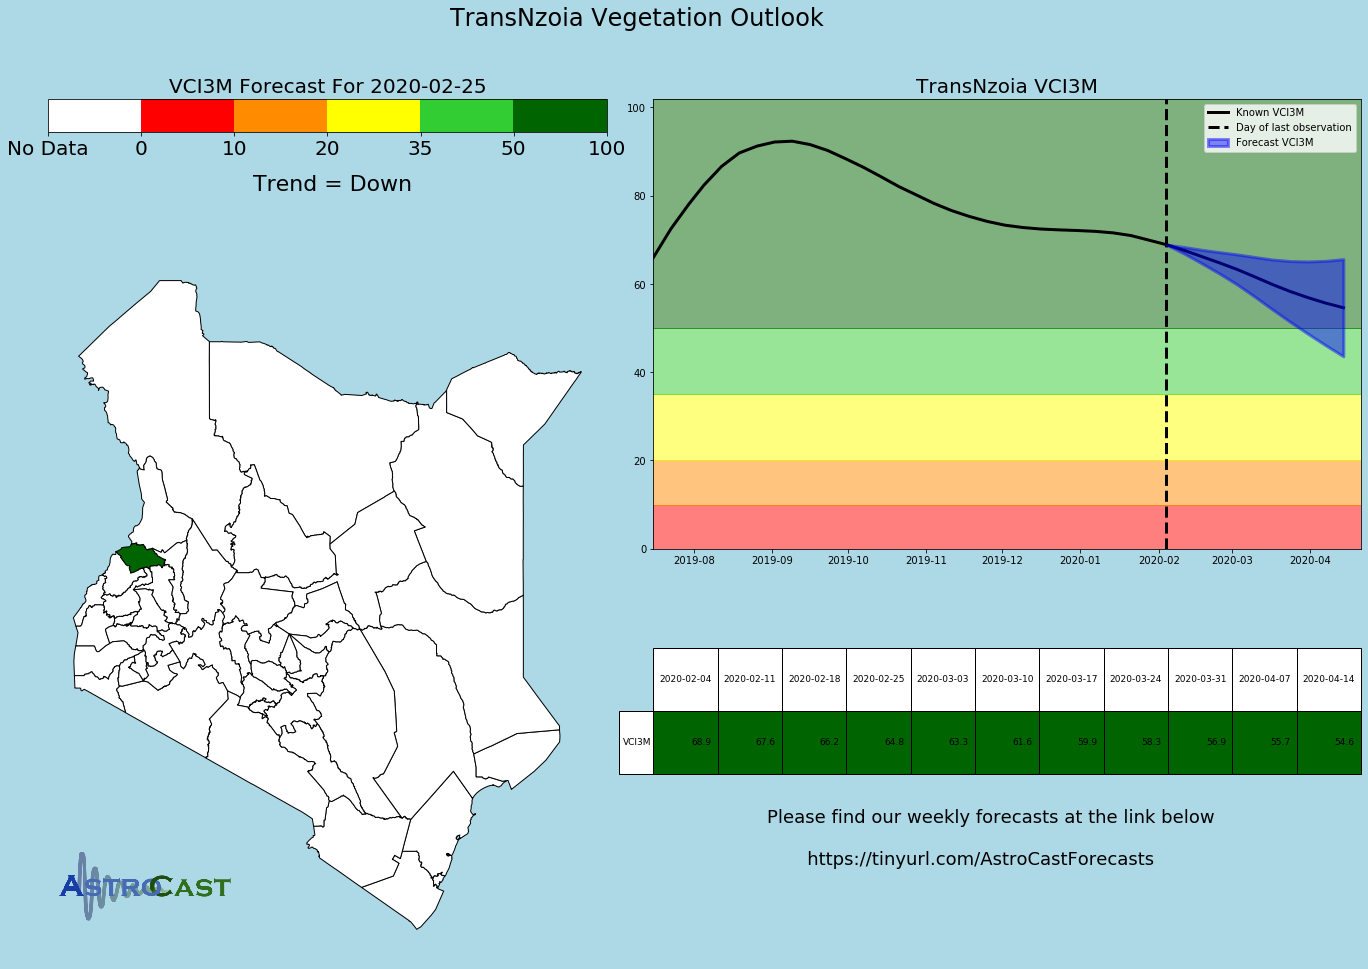

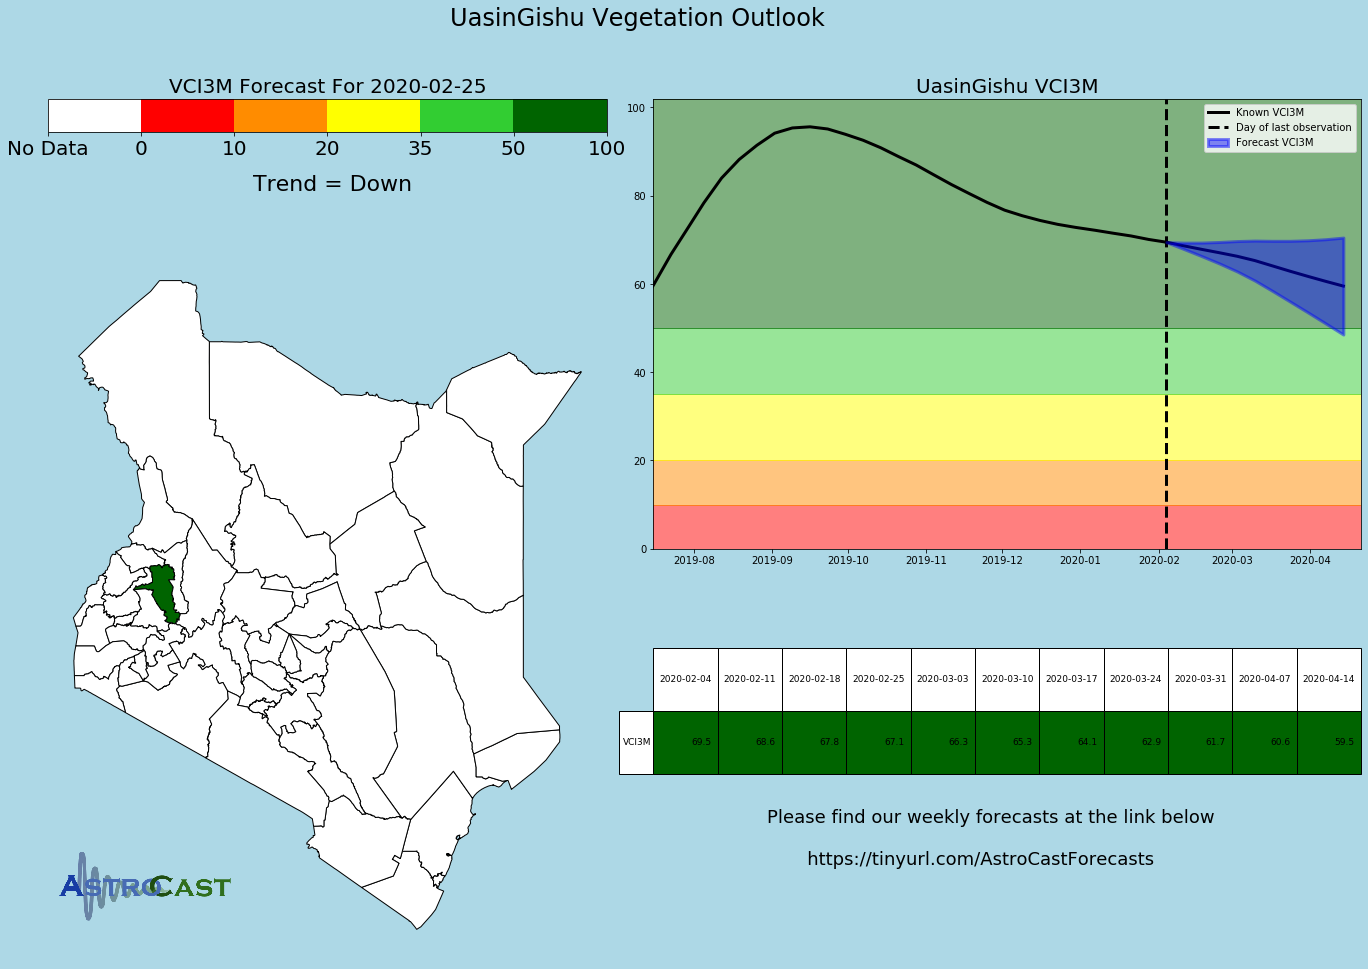

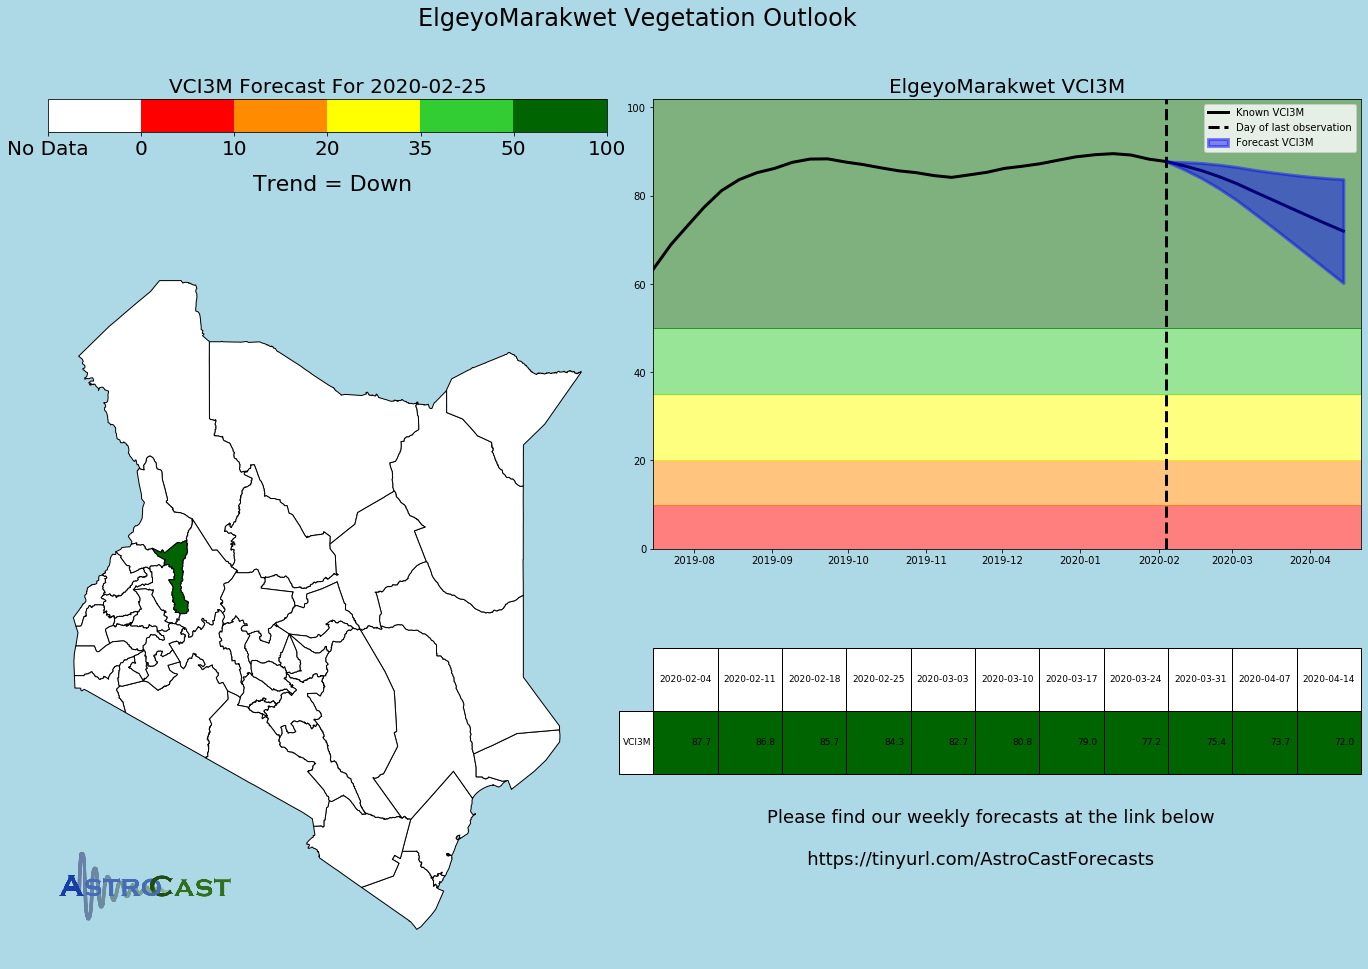

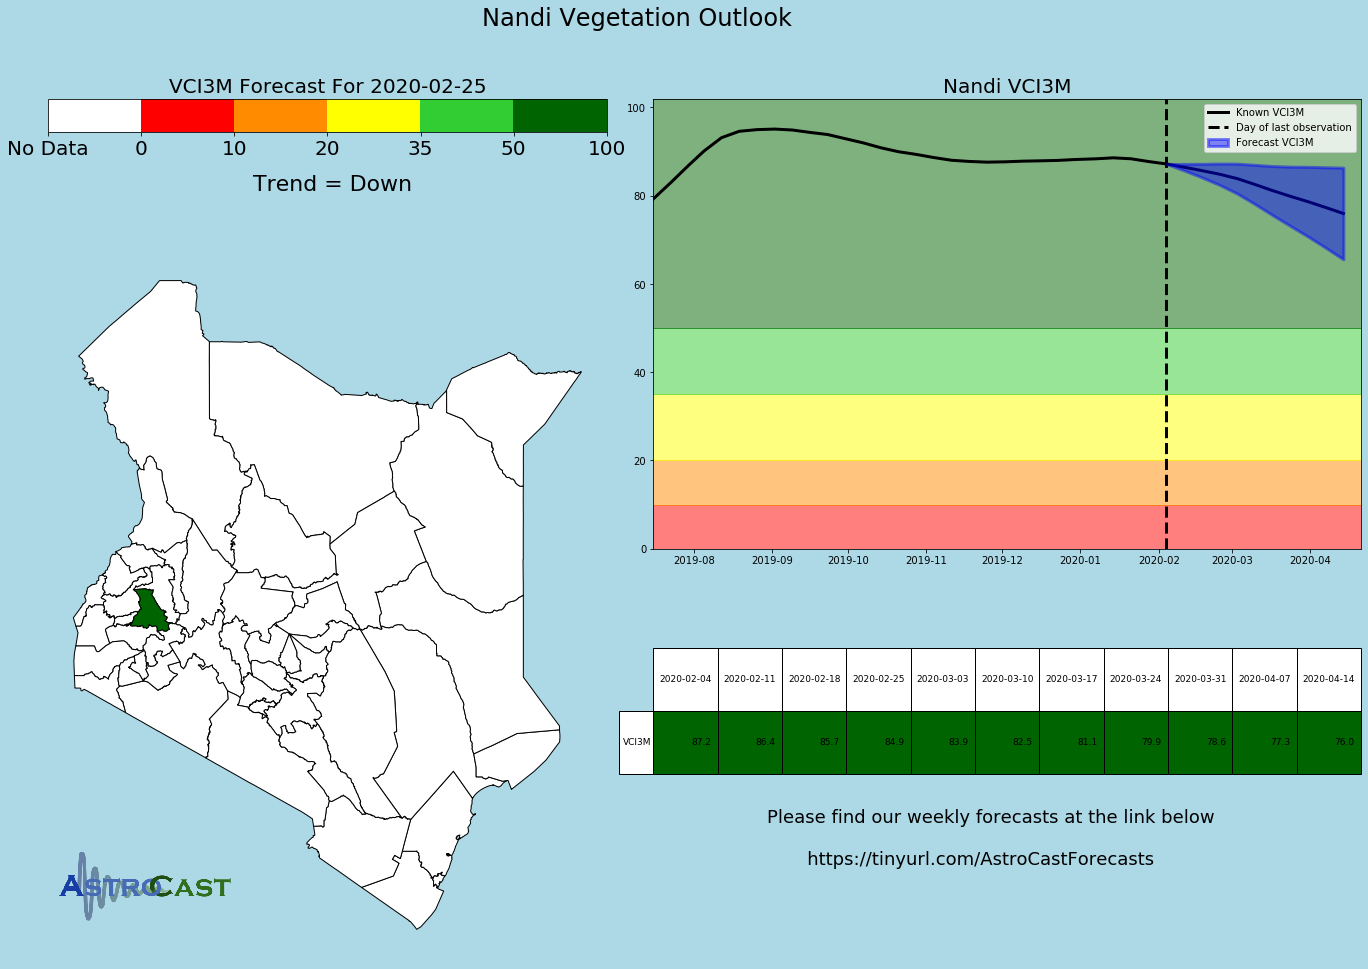

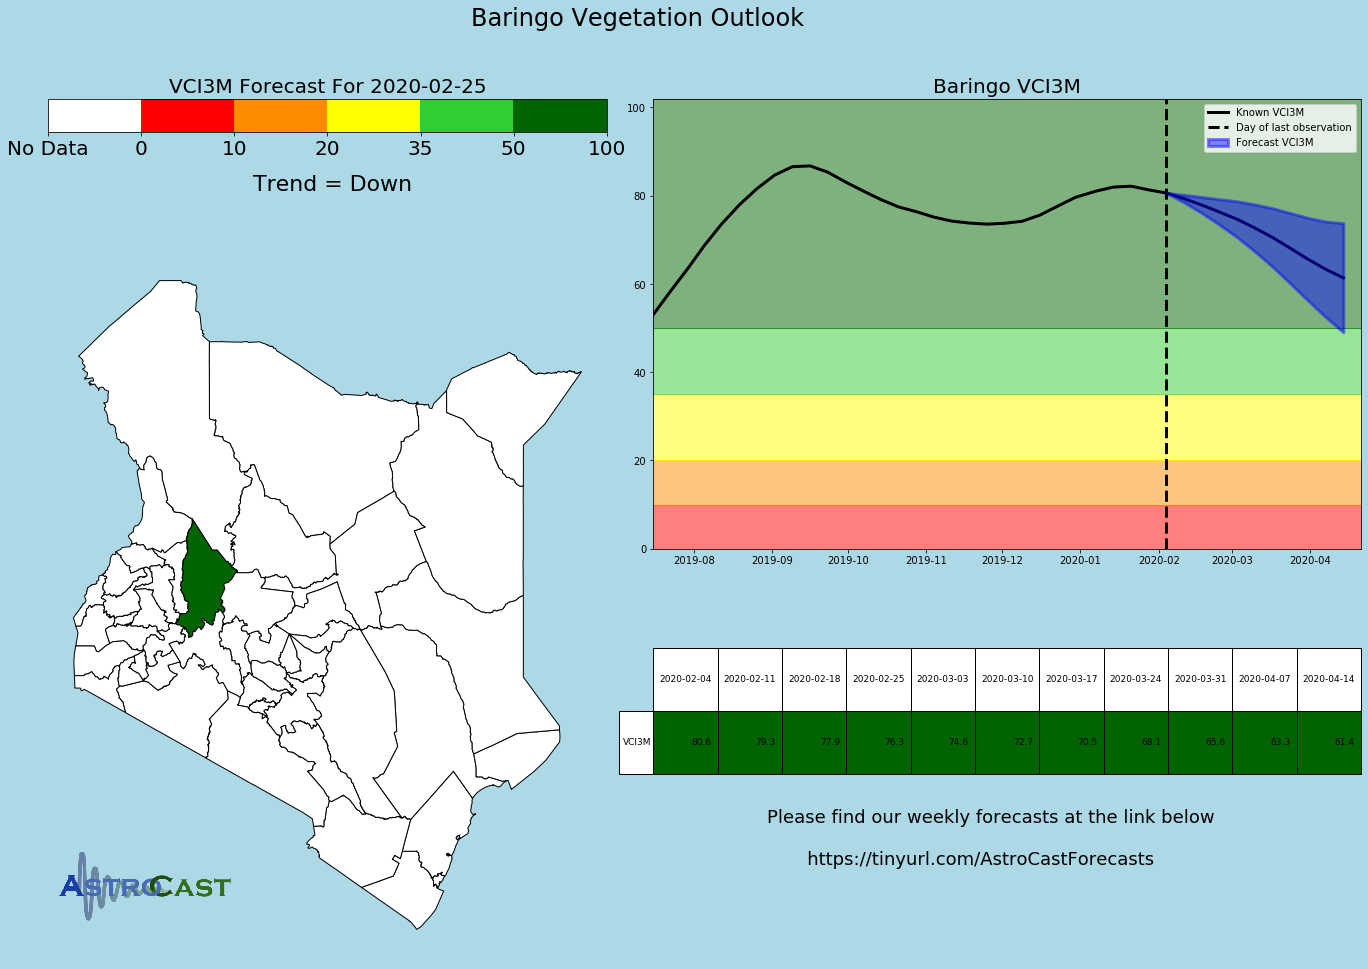

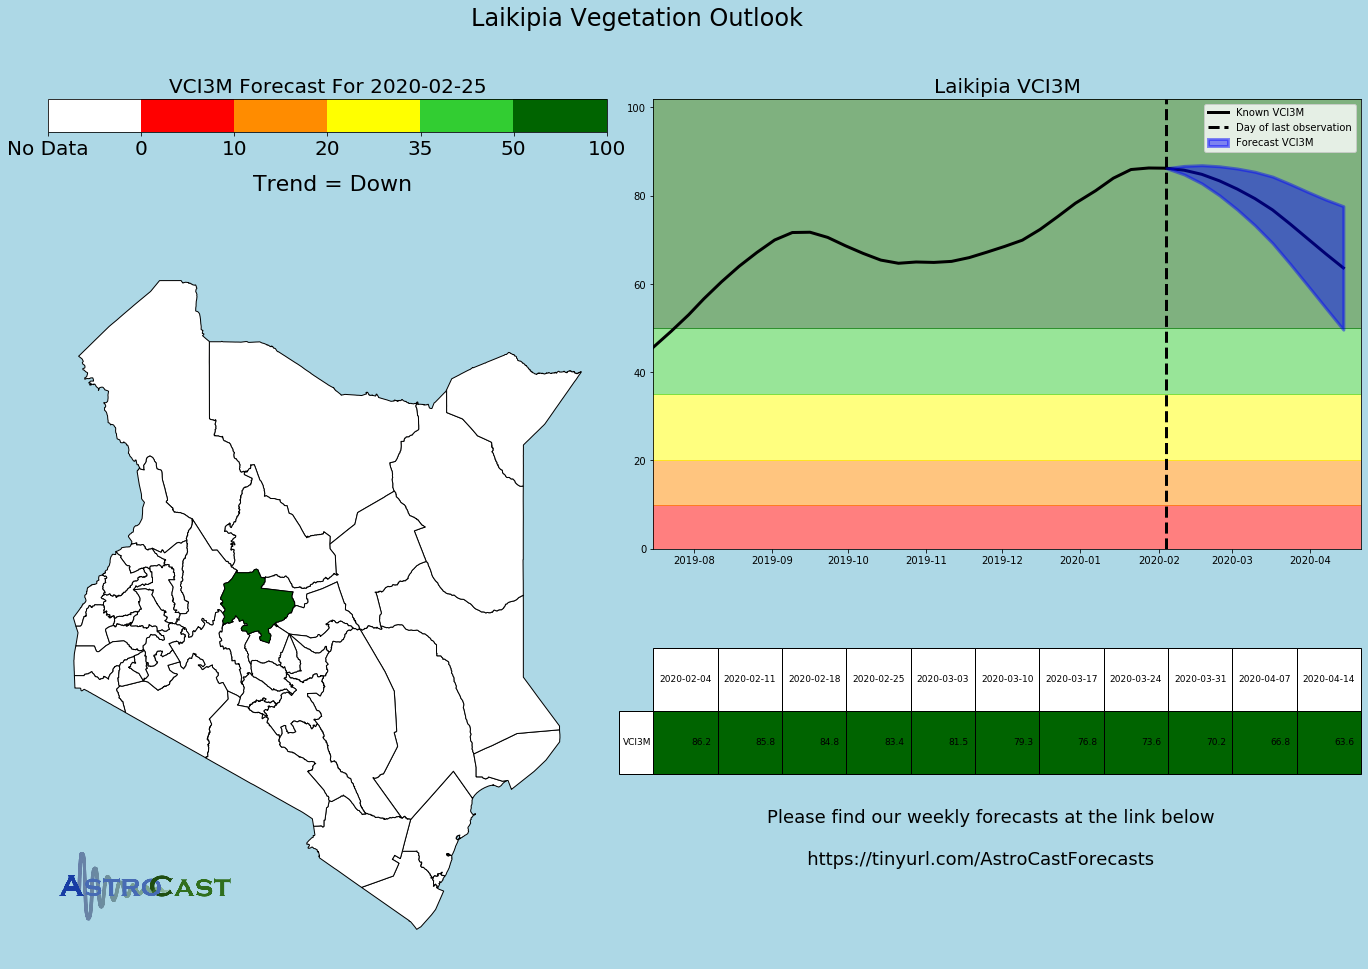

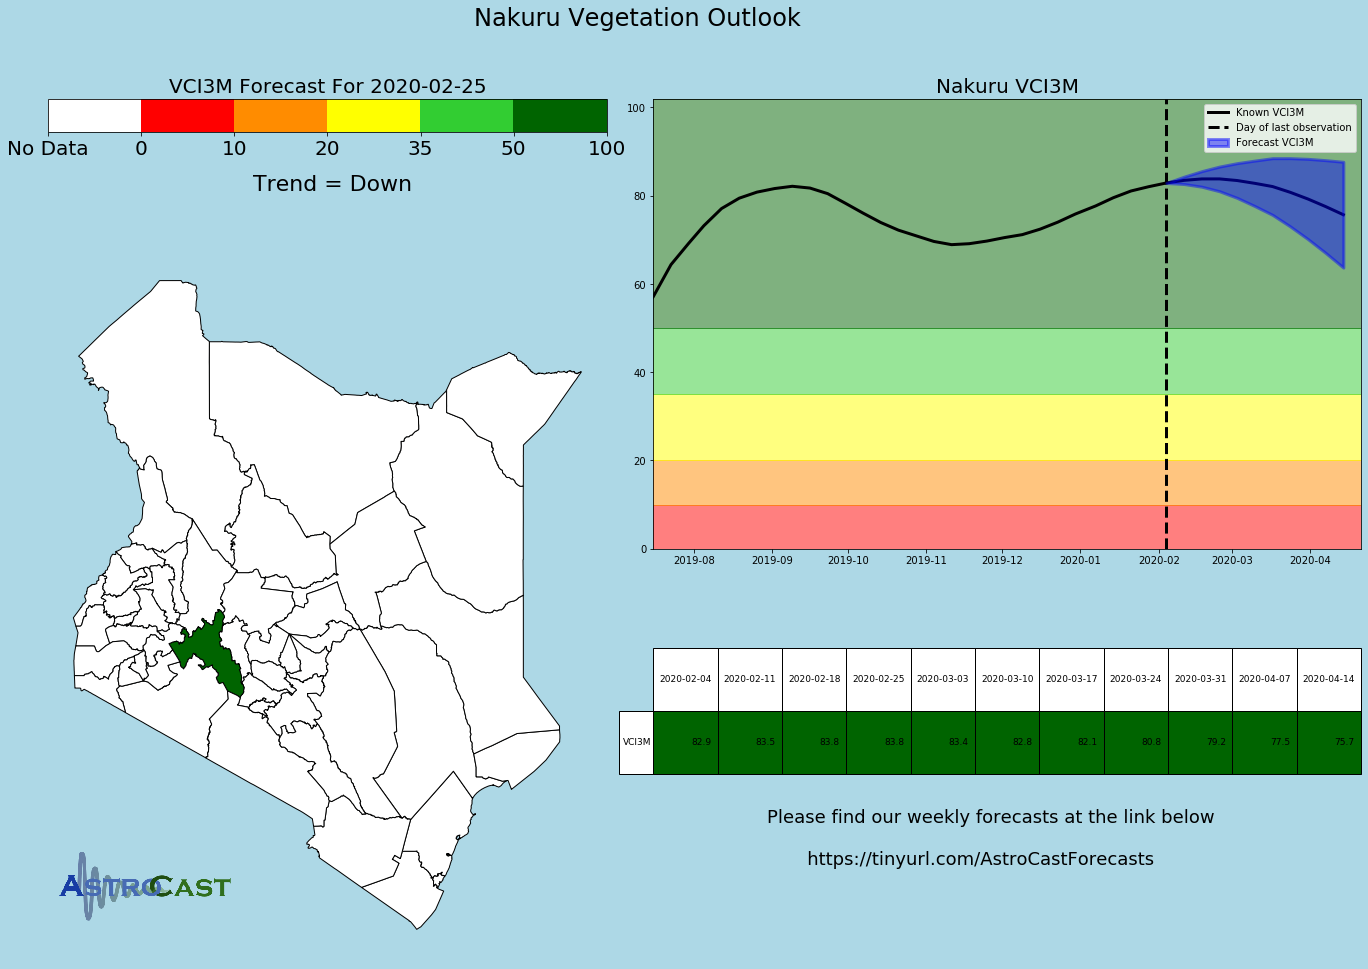

In [ ]:
# Loading in VCI data

Data = np.load('..\Data\VCI_Time_Series.npz',allow_pickle=True)


ForecastArray = np.empty((47,2,11),dtype = object)


for CountyCounter,County in enumerate(Data):
    # Making sure each array has the correct format

    Dates,VCI1W,VCI3M = np.array(Data[County][0],dtype=object),np.array(Data[County][2],dtype=float),np.array(Data[County][3],dtype=float)

    # Loading in the errors to be used. We shall be forecasting up to 10 weeks.

    Errors = np.load('..\Data\Errors.npz')

    CountyErrors = Errors[County][:11]

    PredictionDates,WeeklyDates,WeeklyVCI3M,PredictedValues = Forecasting.GetForecastVCI(Dates,VCI1W,VCI3M)
    
    
    ForecastArray[CountyCounter,0,:] = PredictionDates
    ForecastArray[CountyCounter,1,:] = PredictedValues
    
    CreatePDF.PDF(PredictionDates,PredictedValues,WeeklyDates,WeeklyVCI3M,CountyErrors,county= County,CountyNo=CountyCounter,AllCounties=True)
    
    


<center><font size = "6">Once we have all the county level forecasts, we can create a GIF that shows how the VCI3M will change throughout Kenya over the coming 10 weeks.</font></center>

In [ ]:
GIF_Creation.CreateGIF(ForecastArray)